# 1. Setup

## 1.1.	Importing relevant Libraries and packages

In [319]:
import pandas as pd # data analysis
import numpy as np #mathematical operations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns #interface for informative statistical graphics
import plotly as plotly
import plotly.express as px #Needed this to create pie-chart
import plotly.io as pio #To save graph as png
import datetime, warnings
import matplotlib.cm as cm
import itertools
import sklearn.cluster as cluster #Efficient tools for clustering 
import matplotlib.patches as mpatches
import matplotlib
# matplotlib.rc('xtick', labelsize=10) 
# matplotlib.rc('ytick', labelsize=10) 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import silhouette_score,silhouette_samples, confusion_matrix, classification_report, f1_score,fbeta_score,precision_score, recall_score
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display
from plotly.offline import init_notebook_mode
from scipy import stats
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline
pd.set_option('display.max_columns', 500)

## 1.2.	Importing Dataset as csv

In [321]:
dataset=pd.read_csv(r"C:\Users\bilal\Downloads\Ecommerce Dataset\Dataset.csv", low_memory=False)
#have set low memory to "false", in order to avoid panda being efficient and load whole file together


# 2.	Preprocessing

## 2.1.	Analysing how data look

### 2.1.1.	 Analysing Data Shape

In [322]:
print('Dataframe dimensions:', dataset.shape)

Dataframe dimensions: (1048575, 26)


### 2.1.2.	 Analysing first few lines of data to build understanding of the features

In [323]:
# show first lines
display(dataset.head())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


## 2.2.	Dropping Unnecessary data

### 2.2.1.	Dropping dummy columns generated by Panda when reading CSV

In [324]:
dataset = dataset.dropna(axis=1, how='all')
#axis=1 is selected and to drop only those columns which has all NaN values how = "all" is used

#### 2.2.1.1.	Confirming if they are removed by analysing shape again

In [325]:
#Confirming if the extra columns are gone
dataset.shape 

(1048575, 21)

### 2.2.2.	Dropping Null Values

#### 2.2.2.1.	Checking the percentage of Null values against data

In [326]:
# gives some information on columns types and numer of null values
tab_info=pd.DataFrame(dataset.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(dataset.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(dataset.isnull().sum()/dataset.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
column type,float64,object,object,object,float64,float64,float64,object,object,object,float64,object,object,object,object,float64,float64,object,object,object,float64
null values (nb),464051,464066,464051,464071,464051,464051,464051,464051,464215,601226,464051,464051,464051,464051,464051,464051,464051,464062,464051,464051,464062
null values (%),44.255394,44.256825,44.255394,44.257302,44.255394,44.255394,44.255394,44.255394,44.271034,57.337434,44.255394,44.255394,44.255394,44.255394,44.255394,44.255394,44.255394,44.256443,44.255394,44.255394,44.256443


#### 2.2.2.2.	Removing Customer IDs with Null values

It is observed from the above output that around 44.25% of values are not even assigned to anything, so they are removed.

In [327]:
dataset.dropna(axis = 0, subset = ['Customer ID'], inplace = True)
print('Dataframe dimensions:', dataset.shape)


Dataframe dimensions: (584513, 21)


#### 2.2.2.3.	Checked percentage again to confirm how data looked

In [328]:
tab_info=pd.DataFrame(dataset.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(dataset.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(dataset.isnull().sum()/dataset.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
column type,float64,object,object,object,float64,float64,float64,object,object,object,float64,object,object,object,object,float64,float64,object,object,object,float64
null values (nb),0,15,0,20,0,0,0,0,164,137164,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.002566,0.0,0.003422,0.0,0.0,0.0,0.0,0.028058,23.466373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.2.3.	Dropping duplicate values

#### 2.2.3.1.	Checking Duplicate values but did not find any

In [329]:
print('Number of Duplicate values in this dataset = {}'.format(dataset.duplicated().sum()))
dataset.drop_duplicates(inplace = True)

Number of Duplicate values in this dataset = 0


### 2.2.4.	Finding Missing values

#### 2.2.4.1.	Analysed missing values in the dataset and created a graph of that

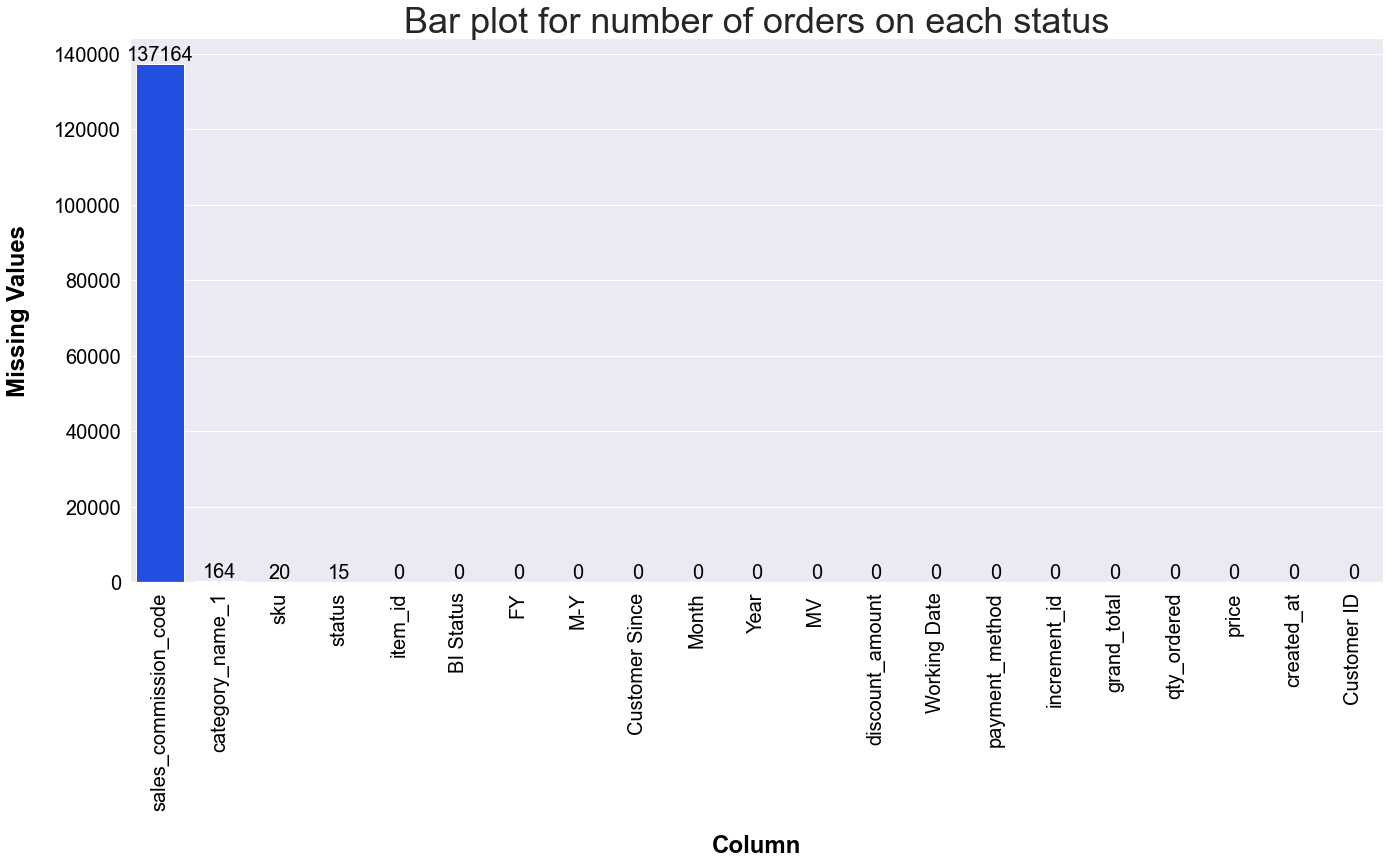

In [330]:
#Sorting out missing values
missing_values = dataset.isna().sum().sort_values(ascending=False)

missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

plt.figure(figsize=(20,10))

#Creating a Bar Chart
sns.set(font_scale = 3)
ax = sns.barplot(data=missing_values_df, x = 'Column', y = 'Missing_Values', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='black')
ax.set(title='Bar plot for number of orders on each status')


#Setting up axis label size and colours of axis label
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

#setting up axis label name and size
ax.set_xlabel('Column', fontsize=24, labelpad=24, color='black', fontweight='bold')
ax.set_ylabel('Missing Values', fontsize=24, labelpad=24, color='black', fontweight='bold')

#setting up x-axis labels vertically and horizontal alignment to center
plt.xticks(rotation=90, ha='center');

#### 2.2.4.2.	Dropped the “sales_commission_code” and “BI Status” columns because they were not necessary

In [331]:
#In the above graph it is cleared that majorly missing values are in the sales commission column which is understandable. Anyway, we do not need to commission code



dataset = dataset.drop(columns=['sales_commission_code',"BI Status"])
dataset=dataset.dropna()
dataset.shape

(584314, 19)

### 2.2.5.	Removing date columns which shared the same data but with different names

#### 2.2.5.1.	Checking The Types of Dataset Columns
###### Values are given data types to ensure that they perform properly and without errors. The attribute that tells a computer how to interpret the data is the data type.

In [332]:
dataset.dtypes


item_id            float64
status              object
created_at          object
sku                 object
price              float64
qty_ordered        float64
grand_total        float64
increment_id        object
category_name_1     object
discount_amount    float64
payment_method      object
Working Date        object
 MV                 object
Year               float64
Month              float64
Customer Since      object
M-Y                 object
FY                  object
Customer ID        float64
dtype: object

#### 2.2.5.2.	Converting Date Columns to Date type

In [333]:
dataset['created_at'] = pd.to_datetime(dataset['created_at'])
dataset['Working Date'] = pd.to_datetime(dataset['created_at'])
dataset['M-Y'] = pd.to_datetime(dataset['M-Y'])
dataset['Customer Since'] = pd.to_datetime(dataset['Customer Since'])


#### 2.2.5.3.	Checking the variable_types of Dataset column again to asure that conversions worked

In [334]:
dataset.dtypes

item_id                   float64
status                     object
created_at         datetime64[ns]
sku                        object
price                     float64
qty_ordered               float64
grand_total               float64
increment_id               object
category_name_1            object
discount_amount           float64
payment_method             object
Working Date       datetime64[ns]
 MV                        object
Year                      float64
Month                     float64
Customer Since     datetime64[ns]
M-Y                datetime64[ns]
FY                         object
Customer ID               float64
dtype: object

#### 2.2.5.4.	Checking if the column created_at same as working_date



In [335]:
dataset.loc[dataset["created_at"] != dataset["Working Date"]].nunique()

item_id            0
status             0
created_at         0
sku                0
price              0
qty_ordered        0
grand_total        0
increment_id       0
category_name_1    0
discount_amount    0
payment_method     0
Working Date       0
 MV                0
Year               0
Month              0
Customer Since     0
M-Y                0
FY                 0
Customer ID        0
dtype: int64

It shows that both columns have same values

#### 2.2.5.5.	Checking if the columns M-Y, has the same information as month and year of created_at column dates

In [336]:
dataset.loc[dataset["created_at"].dt.strftime(
    '%m/%Y') != dataset["M-Y"].dt.strftime('%m/%Y')].nunique()

item_id            0
status             0
created_at         0
sku                0
price              0
qty_ordered        0
grand_total        0
increment_id       0
category_name_1    0
discount_amount    0
payment_method     0
Working Date       0
 MV                0
Year               0
Month              0
Customer Since     0
M-Y                0
FY                 0
Customer ID        0
dtype: int64

#### 2.2.5.6.	Dropping the columns of date which represent same data

Working Date is same as created_at
M-Y has the same information as the month and year of created_at
Year column has exactly same years as created_at column's 
Month column has exactly same month as created_at column's 
FY just represent financial year so also not relevant to have separate column


In [337]:
dataset = dataset.drop(columns=['Working Date', "M-Y", "Year", "Month", "FY"])


#### 2.2.5.7.	Checking the Dataset again to confirm the changes

In [338]:
dataset.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,MV,Customer Since,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,"1,950",2016-07-01,1.0
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,0.0,cod,240,2016-07-01,2.0
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,0.0,cod,"2,450",2016-07-01,3.0
3,211135.0,complete,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,360,2016-07-01,4.0
4,211136.0,order_refunded,2016-07-01,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,0.0,cod,"1,110",2016-07-01,5.0


### 2.2.6.	 Finding the insight on the statistical analysis

In [339]:
dataset.describe()  # To find description of numerical data (statistical analysis)

,item_id,price,qty_ordered,grand_total,discount_amount,Customer ID
count,584314.000000,5.843140e+05,584314.000000,5.843140e+05,584314.000000,584314.000000
mean,565590.346478,6.350766e+03,1.294308,8.532892e+03,499.655327,45779.112402
std,200101.173141,1.495150e+04,3.988150,6.133168e+04,1507.185808,34411.486271
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,1.000000
25%,394945.250000,3.600000e+02,1.000000,9.452000e+02,0.000000,13511.000000
50%,568301.000000,8.994000e+02,1.000000,1.961000e+03,0.000000,42850.000000
75%,738981.750000,4.090000e+03,1.000000,6.999000e+03,160.734400,73513.750000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,115326.000000


#### 2.2.6.1.	Checking what status result in negative grand total

Text(0, 0.5, 'Count')

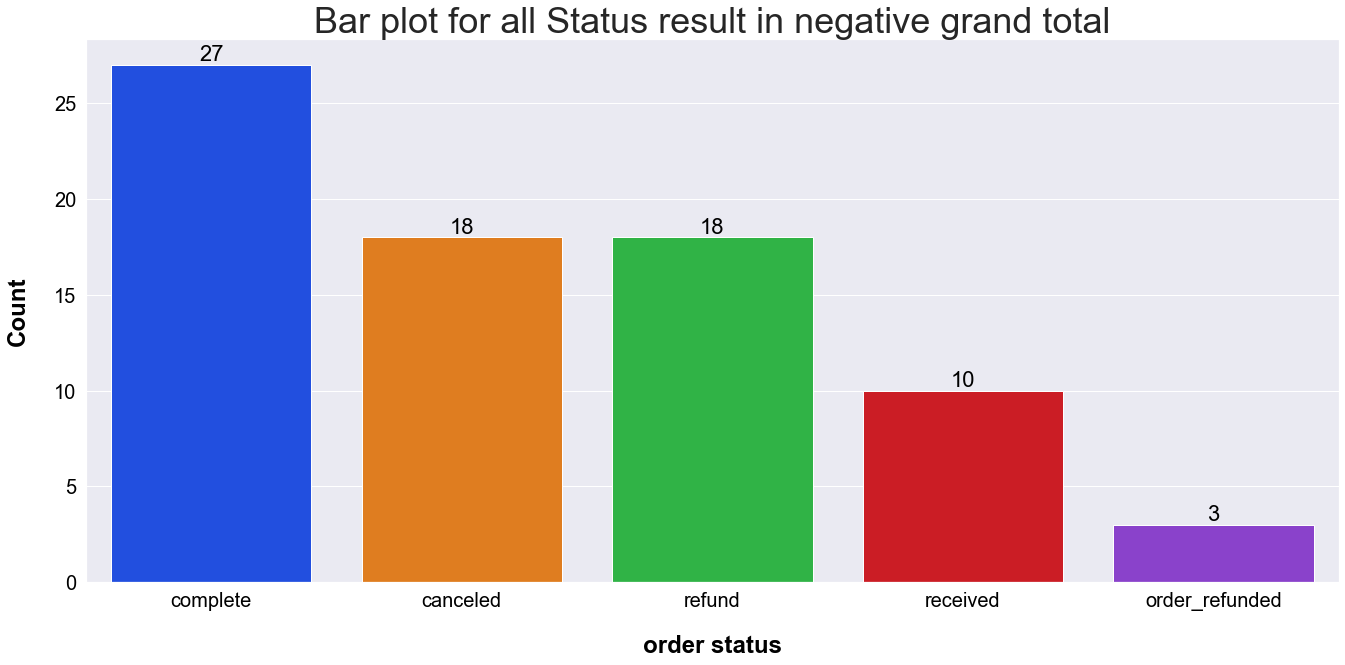

In [340]:
#To investigate the negative value in grand total minimum
gt = dataset[dataset.grand_total < 0].status.value_counts().to_dict() #checked the less than 0 that are negative values, count them and convert the data set into dictionary
gt_df = pd.DataFrame(list(gt.items()), columns=["Order Status","Count"])

#Defining the figure size
plt.figure(figsize=(20,10))

#Creating a Bar Chart
sns.set(font_scale = 3)
ax = sns.barplot(data=gt_df, x = "Order Status", y="Count", palette = "bright")
ax.set(title='Bar plot for all Status result in negative grand total')
ax.bar_label(container = ax.containers[0],padding = 0, fontsize = 22, color ="black")


#Setting up axis label size and colours of axis label
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.tick_params(axis="x",colors = "black")
ax.tick_params(axis="y",colors = "black")

#setting up axis label name and size
plt.xlabel("order status",fontsize=24,labelpad=24,color = "black", fontweight='bold')
plt.ylabel("Count",fontsize=24,labelpad=24,color = "black",fontweight='bold')



# it was giving error: AttributeError: 'AxesSubplot' object has no attribute 'bar_label' so updating matplotlib in 1st cell and removed that cell to avoid updating check again and again

#### 2.2.6.2.	Removing values with negative grand total

In [341]:
dataset = dataset[dataset.grand_total > 0] #got rid of negative values

#### 2.2.6.3.	Checking the statistical analysis again to confirm

In [342]:
dataset.describe()  # To find description of numerical data (statistical analysis)

,item_id,price,qty_ordered,grand_total,discount_amount,Customer ID
count,574622.000000,5.746220e+05,574622.000000,5.746220e+05,574622.000000,574622.000000
mean,565443.072963,6.403167e+03,1.295930,8.676854e+03,497.777652,45775.363583
std,200116.352779,1.501080e+04,3.998761,6.183665e+04,1500.089747,34385.856171
min,211131.000000,0.000000e+00,1.000000,2.100000e-01,-599.500000,1.000000
25%,394666.250000,3.600000e+02,1.000000,9.940000e+02,0.000000,13575.000000
50%,568496.500000,9.000000e+02,1.000000,1.999000e+03,0.000000,42839.000000
75%,738392.750000,4.335000e+03,1.000000,7.220800e+03,162.000000,73489.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,115326.000000


### 2.2.7.	Removing unnecessary statuses

#### 2.2.7.1.	Analysing the statuses against number of orders

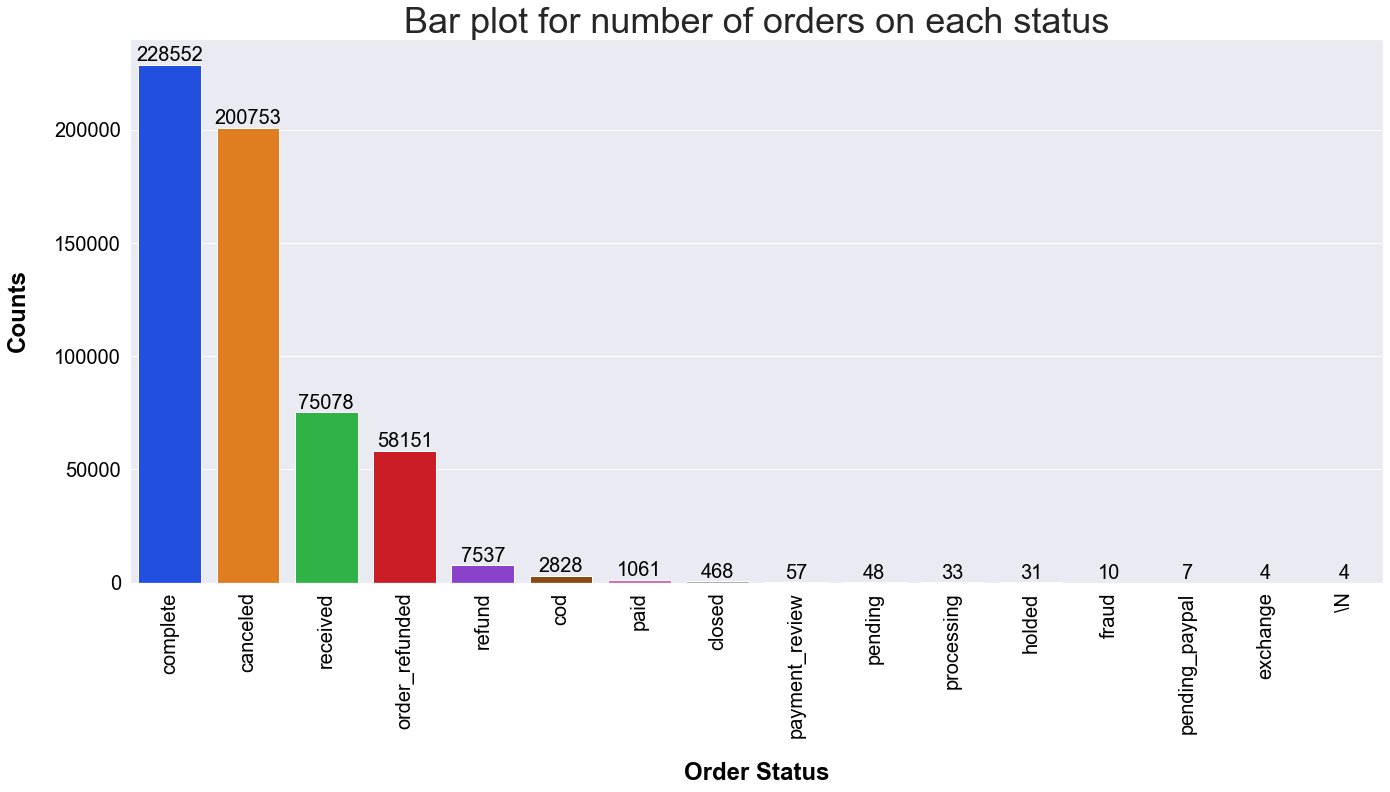

In [343]:
plt.figure(figsize=(20,10))

order_status = dataset.status.value_counts()
order_status_df = pd.DataFrame(list(order_status.items()), columns=['Order Status', 'Counts'])

#Creating a Bar Chart
sns.set(font_scale = 3)
ax = sns.barplot(data = order_status_df, x='Order Status', y ="Counts", palette ="bright")
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='black')
ax.set(title='Bar plot for number of orders on each status')

#Setting up axis label size and colours of axis label
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

#setting up axis label name and size
plt.xlabel('Order Status', fontsize=24, labelpad=24, color='black',fontweight='bold')
plt.ylabel('Counts', fontsize=24, labelpad=24, color='black',fontweight='bold')

#setting up x-axis labels vertically and horizontal-alignment to center
plt.xticks(rotation=90, ha='center');

From above graph it is observed that alot of status useless and can be generalised:
Received, COD, paid,closed, exchange all means that order is completed by the user, and so we marked all of them complete

Statuses like order refunded, refund and fraud means they weren't completed and so meant to be cancelled

Status like  payment_review, processing, holded and pending paypal meant they aren't completed, nor they have to be cancelled, so we just put them under pending umbrella

#### 2.2.7.2.	Merging the statuses which meant same for us

In [344]:
#orders with the status like complete, cod, paid, received, exchanged are completed orders in our point of view in handling this data, so we will group them under completed.
#Orders with cancelled, order refunded, refund and fraud statuses are grouped under cancelled
#Orders with status like payment_review, pending, processing, holded and pending paypal are all grouped under pending

dataset.status = dataset.status.replace({'complete': 'Completed',
                                             'received': 'Completed',
                                             'cod': 'Completed',
                                             'paid': 'Completed',
                                             'closed': 'Completed',
                                             'exchange': 'Completed',
                                             'canceled': 'cancelled',
                                             'order_refunded': 'cancelled',
                                             'refund': 'cancelled',
                                             'fraud': 'cancelled',
                                             'payment_review': 'Pending',
                                             'pending': 'Pending',
                                             'processing': 'Pending',
                                             'holded': 'Pending',
                                             'pending_paypal': 'Pending'})

### 2.2.8.	Removing Orders with the cancelled and /N statuses

#### 2.2.8.1.	Counting cancelled order against each transaction

In [345]:
dataset[dataset["status"]=="cancelled"].count()

item_id            266451
status             266451
created_at         266451
sku                266451
price              266451
qty_ordered        266451
grand_total        266451
increment_id       266451
category_name_1    266451
discount_amount    266451
payment_method     266451
 MV                266451
Customer Since     266451
Customer ID        266451
dtype: int64

#### 2.2.8.2.	Saved Cancelled orders in a separate dataset

In [346]:
#Saving cancelled orders separately
cancelled = dataset[dataset.status == 'cancelled']

#### 2.2.8.3.	Removed cancelled and /N orders and keeping Completed and Pending

(array([0, 1]), [Text(0, 0, 'Completed'), Text(1, 0, 'Pending')])

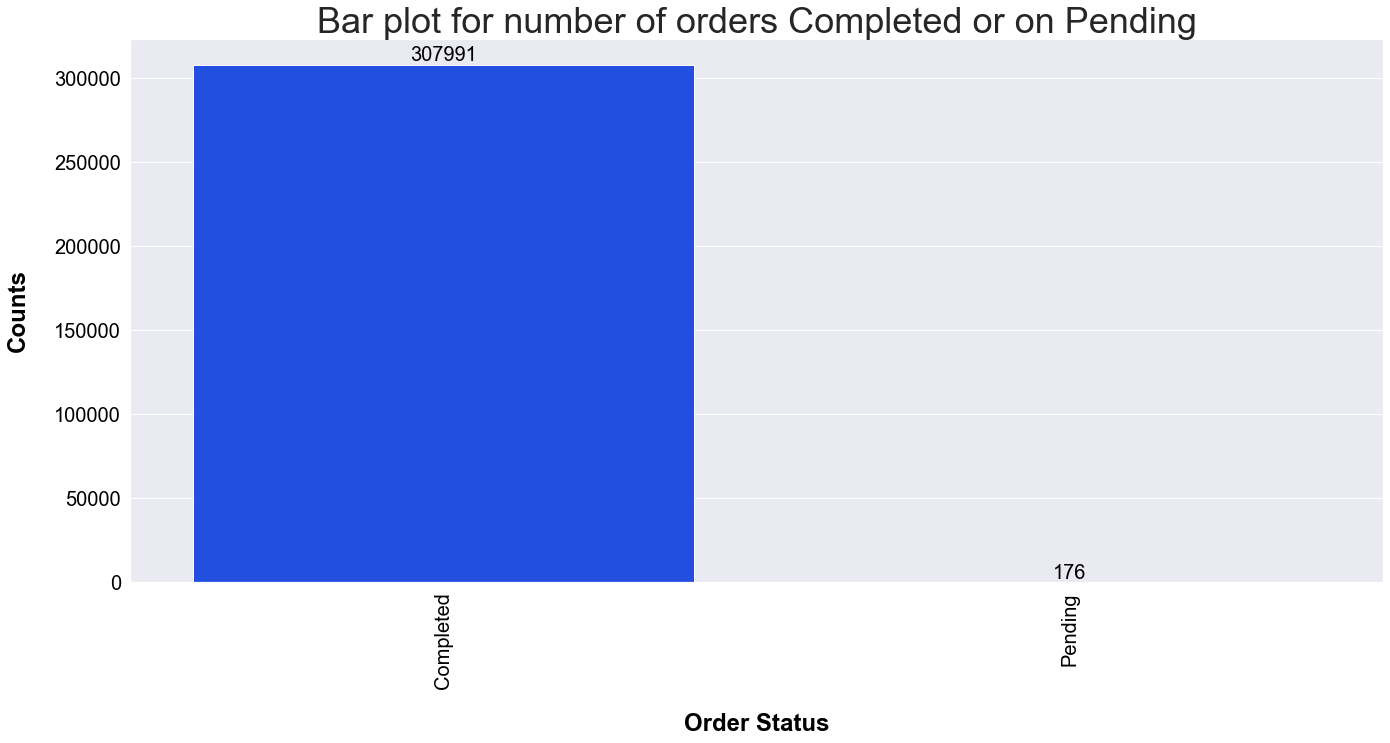

In [347]:
dataset = dataset[(dataset.status == 'Completed')
                  | (dataset.status == 'Pending')]
status_updated = dataset.status.value_counts()

status_updated_df = pd.DataFrame(list(status_updated.items()), columns=[
                                 'Order Status', 'Counts'])

plt.figure(figsize=(20, 10))

#Creating a Bar Chart
sns.set(font_scale=3)
ax = sns.barplot(data=status_updated_df, x='Order Status',
                 y='Counts', palette='bright')
ax.bar_label(container=ax.containers[0], padding=0, fontsize=20, color='black')
ax.set(title='Bar plot for number of orders Completed or on Pending')


#Setting up axis label size and colours of axis label
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

#setting up axis label name and size
plt.xlabel('Order Status', fontsize=24, labelpad=24,
           color='black', fontweight='bold')
plt.ylabel('Counts', fontsize=24, labelpad=24,
           color='black', fontweight='bold')

#setting up x-axis labels vertically and horizontal-alignment to center
plt.xticks(rotation=90, ha='center')

## 2.3.	Getting Insight on the data

### 2.3.1.	Counting number of Products, Transactions and Customers to get insight how dataset looks

In [348]:
pd.DataFrame([{'products': len(dataset['sku'].value_counts()),
               'transactions': len(dataset['increment_id'].value_counts()),
               'customers': len(dataset['Customer ID'].value_counts()),
               }], columns=['products', 'transactions', 'customers'], index=['quantity'])


,products,transactions,customers
quantity,62531,202314,79309


It is observed that 79K(79309) customers has bought 62K(62531) products in 200K(202314) transactions
Now will find number of products in each transaction

### 2.3.2.	Counting number of products in every transaction

In [349]:
temp = dataset.groupby(
    by=['Customer ID', 'increment_id', "status"], as_index=False)['created_at'].count()
nb_products_per_basket = temp.rename(columns={'created_at': 'Number of products'})
nb_products_per_basket.head().sort_values('Customer ID')


,Customer ID,increment_id,status,Number of products
0,1.0,100147443,Completed,1
1,3.0,100306394,Completed,4
2,4.0,100147446,Completed,1
3,4.0,100148389,Completed,1
4,4.0,100149432,Completed,1


### 2.3.3.	Renaming columns which had confusing names

Created at column is same as order date and category name 1 is just the category, increment ID is order number

In [350]:
dataset = dataset.rename(columns={"created_at": "order_date", "category_name_1": "category","increment_id":"order_no"})
cancelled = cancelled.rename(columns={
                             "created_at": "order_date", "category_name_1": "category", "increment_id": "order_no"})


### 2.3.4.	 Finding Orders per customer

In [351]:
#Number of Orders vs number of customers

num_of_orders = dataset.groupby("Customer ID")["order_no"].nunique().sort_values(ascending=False) #Grouping Customers with increment ids and counting unique values
num_of_orders_df = pd.DataFrame(list(num_of_orders.items()),columns = ["Customer ID","Number of Orders"])

x = num_of_orders_df[num_of_orders_df["Number of Orders"] == 1].value_counts().sum()
y = num_of_orders_df[num_of_orders_df["Number of Orders"] != 1].value_counts().sum()


data = {"order" : ["Customers with Single orders", "Customers with Multiple orders"], "Customer_Counts": [x,y]}

order_counts = pd.DataFrame.from_dict(data)

#Creating a pie chart
fig = px.pie(order_counts, 
             values = order_counts.Customer_Counts, 
             names = order_counts.order,
             template = 'plotly_white')

#Setting up the pie chart cosmetics
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=18,
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()
#plotly.offline.iplot(fig, validate=False, filename='worldmap', image='png')
pio.write_image(fig, 'pie1.png')


Above chart shows that around 2/3rd of customers have only one order while 1/3rd of customers have placed more than one orders

### 2.3.5.	Finding Orders per category

In [352]:
#Number of Orders vs Categories

num_of_prod = dataset.groupby('Customer ID')['category'].nunique().sort_values(ascending=False) #Grouping Customers with categories and counting unique values

num_of_prod_df = pd.DataFrame(list(num_of_prod.items()), columns=['Customer ID', 'Number of Products'])

a = num_of_prod_df[num_of_prod_df['Number of Products'] == 1].value_counts().sum()
b = num_of_prod_df[num_of_prod_df['Number of Products'] != 1].value_counts().sum()

data = {'Order': ['One Category', 'More than One Category'], 'Customer_Counts': [a, b]}

category_counts = pd.DataFrame.from_dict(data)


#Creating a pie chart
fig = px.pie(category_counts, 
             values = category_counts.Customer_Counts, 
             names = category_counts.Order,
             template = 'plotly_white')

#Setting up the pie chart cosmetics
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=18,
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()
pio.write_image(fig, 'pie2.png')


Above Pie Chart shows nearly 28% of customers have ordered from more than one category but 72% of customers only bought from single category

### 2.3.6.	Analysing Cancelled Orders

#### 2.3.6.1.	Finding number of Customers who cancelled

In [353]:
# Number of products in every cancelled transaction
temp = cancelled.groupby(
    by=['Customer ID', 'order_no', "status"], as_index=False)['order_date'].count()
cancelled_prod_per_basket = temp.rename(columns={'order_date': 'Number of products'})

#Finding number of cancelled products and dividing it by total number of transactions of cancelled and completed+pending
m_1 = cancelled_prod_per_basket.shape[0]
m_2 = nb_products_per_basket.shape[0] 
n2 = m_1+m_2
print('Number of orders cancelled: {}/{} ({:.2f}%) '.format(m_1, n2, m_1/n2*100))


Number of orders cancelled: 200126/402440 (49.73%) 


In [354]:
a = dataset['Customer ID'].nunique() + cancelled ['Customer ID'].nunique()
b = cancelled ['Customer ID'].nunique()
print('Number of orders cancelled: {}/{} ({:.2f}%) '.format(b, a, b/a*100))


Number of orders cancelled: 66984/146293 (45.79%) 


#### 2.3.6.2.	Finding number orders which got cancelled

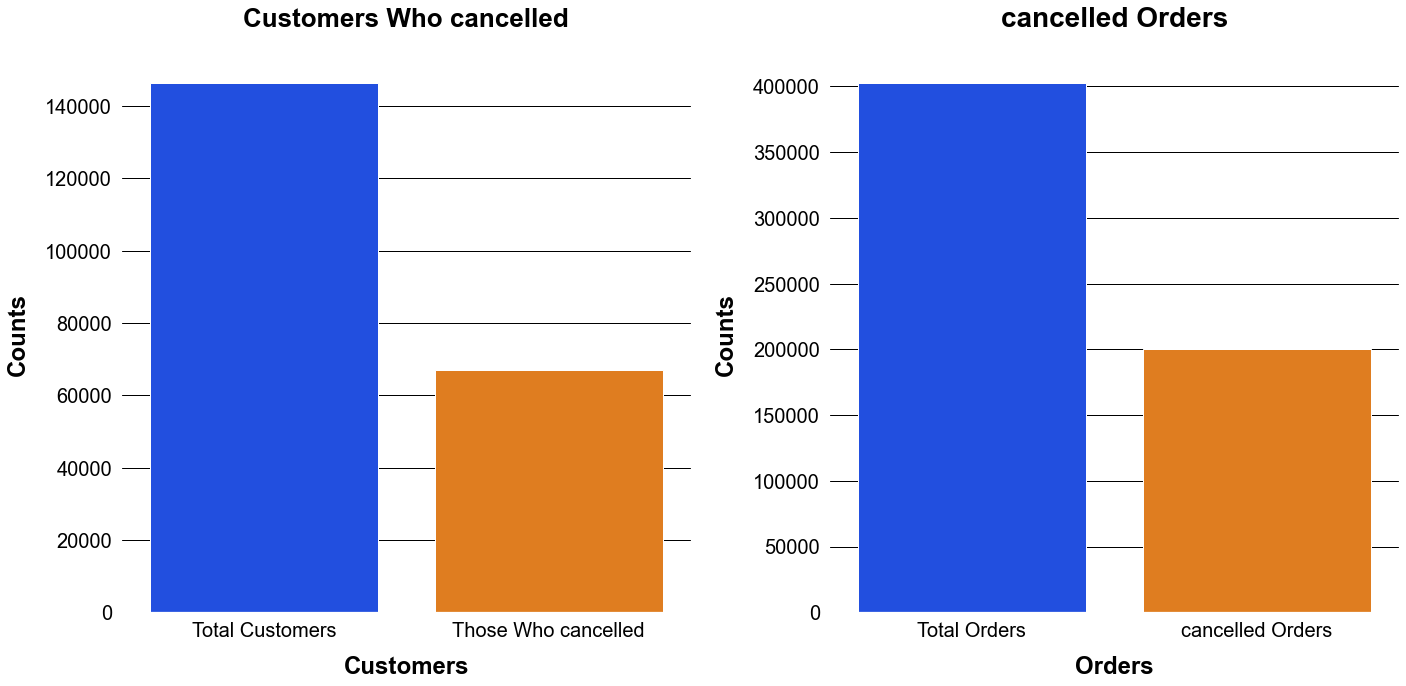

In [355]:
a = dataset['Customer ID'].nunique() + cancelled ['Customer ID'].nunique()
b = cancelled ['Customer ID'].nunique()

data = {'Customers': ['Total Customers', 'Those Who cancelled'], 'Customer_Counts': [a, b]}

customer_counts = pd.DataFrame.from_dict(data)


c = dataset['order_no'].nunique() + cancelled['order_no'].nunique()
d = cancelled ['order_no'].nunique()

data = {'Orders': ['Total Orders', 'cancelled Orders'], 'Order_Counts': [c, d]}

order_counts = pd.DataFrame.from_dict(data)

#Setting up background colour of figures, and grid
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : True,"grid.color": "black"})

#Creating 2 bar plots one for customer who cancelled and the orders which got cancelled
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.barplot(ax = ax[0], data = customer_counts, x=customer_counts.Customers, y=customer_counts.Customer_Counts, palette= 'bright')
sns.barplot(ax = ax[1], data = order_counts, x=order_counts.Orders, y=order_counts.Order_Counts, palette= 'bright')

#Setting 1st barchart cosmetics
ax[0].set_title("Customers Who cancelled", fontsize = 26, pad = 30, color='black', fontweight='bold')
ax[0].set_xlabel("Customers", fontsize = 24, labelpad = 15, color='black', fontweight='bold')
ax[0].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='black', fontweight='bold')
ax[0].tick_params(axis='x', colors='black', labelsize=20)
ax[0].tick_params(axis='y', colors='black', labelsize=20)

#Setting 2nd barchart cosmetics
ax[1].set_title("cancelled Orders", fontsize = 28, pad = 30, color='black', fontweight='bold')
ax[1].set_xlabel("Orders", fontsize = 24, labelpad = 15, color='black', fontweight='bold')
ax[1].set_ylabel("Counts", fontsize = 24, labelpad = 15, color='black', fontweight='bold')
ax[1].tick_params(axis='x', colors='black', labelsize=20)
ax[1].tick_params(axis='y', colors='black', labelsize=20)

plt.tight_layout(pad=2);


#### 2.3.6.3.	Finding categories whose orders mostly get cancelled

In [356]:
#Finding Categories whose orders got cancelled most

cancelled = cancelled.dropna() #Dropping NaN values


fig = px.treemap(cancelled, 
                 path=['category'], template='seaborn',width=1000, height=1000)
fig.update_traces(textfont_color='black',textfont_size=20, selector=dict(type='treemap'))
fig.show()

### 2.3.7.	Understanding product categories

#### 2.3.7.1.	Checking all categories

In [357]:
#Total categories in a dataset
category=dataset["category"].unique()
print("All categories in the dataset =",category)

n=dataset["category"].nunique()
print("number of categories n =",n)

All categories in the dataset = ["Women's Fashion" 'Beauty & Grooming' 'Soghaat' 'Appliances'
 'Home & Living' 'Kids & Baby' 'Mobiles & Tablets' '\\N' "Men's Fashion"
 'Superstore' 'Others' 'Health & Sports' 'Computing' 'Books'
 'School & Education' 'Entertainment']
number of categories n = 16


#### 2.3.7.2.	Checking category name /N

In [358]:
#Exploring category //N 
dataset[dataset["category"]=="\\N"]

,item_id,status,order_date,sku,price,qty_ordered,grand_total,order_no,category,discount_amount,payment_method,MV,Customer Since,Customer ID
99,211242.0,Completed,2016-07-01,urban_ PT004-L,550.0,1.0,550.00,100147518,\N,0.0,cod,550,2016-07-01,47.0
361,211524.0,Completed,2016-07-01,WE_ni72_parrot-veet-gift,1330.0,1.0,1330.00,100147732,\N,0.0,marketingexpense,"1,330",2016-07-01,116.0
483,211660.0,Completed,2016-07-01,E TCF_Educate a child for a month-PKR 1250,1250.0,1.0,994.00,100147840,\N,0.0,cod,"1,250",2016-07-01,16.0
768,212023.0,Completed,2016-07-02,Gasonline-MPT-524-BEIGE-36,1099.0,1.0,1099.00,100148063,\N,0.0,cod,"1,099",2016-07-01,284.0
793,212055.0,Completed,2016-07-02,Gasonline-MPT-560-GREY-30,1099.0,1.0,1099.00,100148078,\N,0.0,cod,"1,099",2016-07-01,284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389624,682965.0,Completed,2017-11-24,OTHOTH5A0945D0A72F4,90.0,2.0,1308.75,100418767,\N,0.0,cod,180,2017-11-01,78466.0
412385,709595.0,Completed,2017-12-06,OTHOTH5A0945D0A72F4,90.0,1.0,1185.00,100433636,\N,0.0,Easypay,90,2017-11-01,71907.0
422952,721912.0,Completed,2017-12-26,OTHOTH5A2F72DBBB0C9,100.0,1.0,250.00,100440407,\N,0.0,cod,100,2017-08-01,59587.0
423231,722242.0,Completed,2017-12-27,MEFQMO59B0942707B79-L,99.0,1.0,249.00,100440593,\N,0.0,cod,99,2017-11-01,66884.0


#### 2.3.7.3.	Merging category /N with category Others

In [359]:
#it seems it is just like others' category, so we will merge both under others
dataset["category"] = dataset["category"].replace('\\N', "Others")

#### 2.3.7.4.	Checking the categories again

In [360]:
#Total categories in a dataset
category=dataset["category"].unique()
print("All categories in the dataset =",category)

All categories in the dataset = ["Women's Fashion" 'Beauty & Grooming' 'Soghaat' 'Appliances'
 'Home & Living' 'Kids & Baby' 'Mobiles & Tablets' 'Others'
 "Men's Fashion" 'Superstore' 'Health & Sports' 'Computing' 'Books'
 'School & Education' 'Entertainment']


#### 2.3.7.5.	Encoding the categories to make them easier to process

##### 2.3.7.5.1.	Using label encoder to encode

In [361]:
#assigning numbers to category name
le = preprocessing.LabelEncoder()
le.fit(dataset["category"])
dataset["category number"] = le.transform(dataset["category"])
dataset.head()


,item_id,status,order_date,sku,price,qty_ordered,grand_total,order_no,category,discount_amount,payment_method,MV,Customer Since,Customer ID,category number
0,211131.0,Completed,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,"1,950",2016-07-01,1.0,14
3,211135.0,Completed,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,300.0,cod,360,2016-07-01,4.0,1
6,211138.0,Completed,2016-07-01,kcc_krone deal,360.0,1.0,60.0,100147449,Beauty & Grooming,300.0,cod,360,2016-07-01,7.0,1
7,211139.0,Completed,2016-07-01,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,100147450,Soghaat,0.0,cod,170,2016-07-01,6.0,12
10,211142.0,Completed,2016-07-01,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",5500.0,1.0,5500.0,100147453,Appliances,0.0,cod,"5,500",2016-07-01,9.0,0


##### 2.3.7.5.2.	Checking what labels are assigned

In [362]:
#checking if the assignment worked
df1=dataset.groupby(["category"])["category"].count()
df2=dataset.groupby(["category number"])["category number"].count()
#print(df2)
#print(df1)
x=(dataset["category"].unique())
y=(dataset["category number"].unique())
tempdf = pd.DataFrame({'Number':y,'Category name':x})
tempdf.sort_values(by="Number").style.hide_index()

Number,Category name
0,Appliances
1,Beauty & Grooming
2,Books
3,Computing
4,Entertainment
5,Health & Sports
6,Home & Living
7,Kids & Baby
8,Men's Fashion
9,Mobiles & Tablets


### 2.3.8.	Categorising amount of each transaction with each category

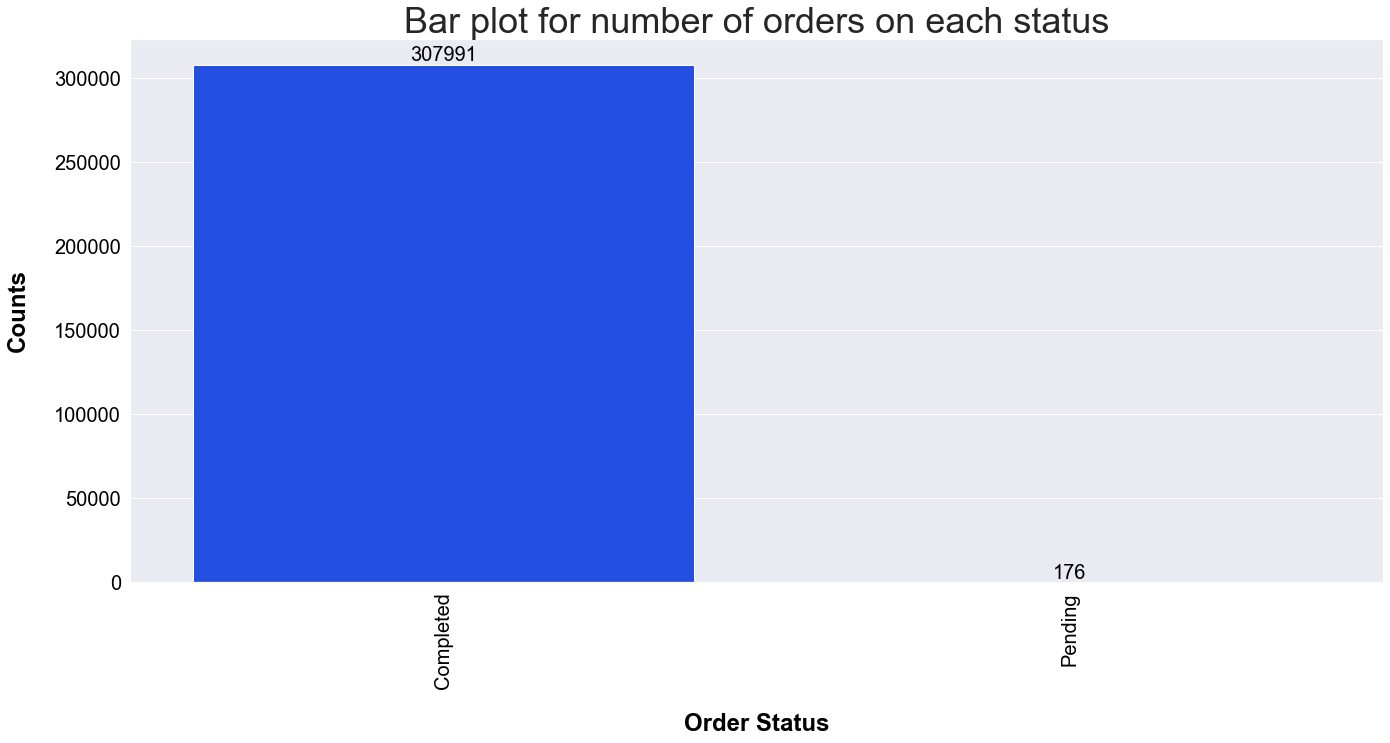

In [363]:
plt.figure(figsize=(20,10))

order_status = dataset.status.value_counts()
order_status_df = pd.DataFrame(list(order_status.items()), columns=['Order Status', 'Counts'])

#Creating a Bar Chart
sns.set(font_scale = 3)
ax = sns.barplot(data = order_status_df, x='Order Status', y ="Counts", palette ="bright")
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 20, color='black')
ax.set(title='Bar plot for number of orders on each status')

#Setting up axis label size and colours of axis label
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

#setting up axis label name and size
plt.xlabel('Order Status', fontsize=24, labelpad=24, color='black',fontweight='bold')
plt.ylabel('Counts', fontsize=24, labelpad=24, color='black',fontweight='bold')

#setting up x-axis labels vertically and horizontal-alignment to center
plt.xticks(rotation=90, ha='center');


#### 2.3.8.1.	Creating column names with each category number

For all the categories, columns are made which will have the amount spent in theat particular category

In [364]:
for i in range(15):
    col = 'category_{}'.format(i)
    df_temp = dataset[dataset["category number"] == i]
    price_temp = df_temp['price'] * \
        (df_temp['qty_ordered']) - df_temp['discount_amount']
    price_temp = price_temp.apply(lambda x: x if x > 0 else 0)
    dataset.loc[:, col] = price_temp
    dataset[col].fillna(0, inplace=True)

filter_col = [col for col in dataset if col.startswith('category_')]
dataset[["order_no", "grand_total", "category number", 'category_0', 'category_1', 'category_2', 'category_3', 'category_4',
         'category_5', 'category_6', 'category_7', 'category_8', 'category_9', 'category_10', 'category_11', 'category_12', 'category_13', 'category_14']]


,order_no,grand_total,category number,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14
0,100147443,1950.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0
3,100147446,60.0,1,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,100147449,60.0,1,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100147450,170.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,0.0,0.0
10,100147453,5500.0,0,5500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,100562385,849.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,699.0
584520,100562386,35899.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35599.0,0.0,0.0,0.0,0.0,0.0
584521,100562387,652178.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,259998.0,0.0,0.0,0.0,0.0,0.0
584522,100562387,652178.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174600.0,0.0,0.0,0.0,0.0,0.0


#### 2.3.8.2.	Defining a new variable total price 

As the name suggest this new variable will indicate the total price of every purchase

In [365]:
dataset['TotalPrice'] = dataset['price'] * (dataset['qty_ordered'])# - dataset['discount_amount']
dataset.sort_values('Customer ID')[:5]

,item_id,status,order_date,sku,price,qty_ordered,grand_total,order_no,category,discount_amount,payment_method,MV,Customer Since,Customer ID,category number,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,TotalPrice
0,211131.0,Completed,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,0.0,cod,"1,950",2016-07-01,1.0,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0
210139,473372.0,Completed,2017-05-19,BD_BIG DEAL_16,350.0,1.0,1245.0,100306394,Mobiles & Tablets,0.0,cod,350,2016-07-01,3.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,350.0
210138,473371.0,Completed,2017-05-19,e-seller_7,66.0,1.0,1245.0,100306394,Mobiles & Tablets,0.0,cod,66,2016-07-01,3.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.0,0.0,66.0
210137,473370.0,Completed,2017-05-19,ALHAMRA_US-0961-K,299.0,1.0,1245.0,100306394,Men's Fashion,0.0,cod,299,2016-07-01,3.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299.0,0.0,0.0,0.0,0.0,0.0,0.0,299.0
210136,473369.0,Completed,2017-05-19,BT_BT-422,530.0,1.0,1245.0,100306394,Men's Fashion,0.0,cod,530,2016-07-01,3.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,530.0,0.0,0.0,0.0,0.0,0.0,0.0,530.0


### 2.3.9.	Merging all transactions of single order into one

#### 2.3.9.1.	Creating a new data frame purchase_price

A new dataframe is created where the information for a particular order is collected and put in as the one single entry as before it was one line per order
It will also have the categories and the total price distributed in those categories columns

In [366]:
#Sum of Purchases (user and order)
temp = dataset.groupby(by=['Customer ID', 'order_no'], as_index=False)['TotalPrice'].sum()
purchase_price = temp.rename(columns = {'TotalPrice':'purchase price'})

#product categories
temp = dataset.groupby(by=["Customer ID","order_no"],as_index = False).sum()[["Customer ID","order_no"]  + [f'category_{i}' for i in range(15)]]
purchase_price = pd.merge(purchase_price, temp, on = ["Customer ID","order_no"])

#Order Date

dataset['order_date_int'] = dataset['order_date'].astype('int64')
temp = dataset.groupby(by=['Customer ID', 'order_no'], as_index=False)['order_date_int'].mean()
dataset.drop('order_date_int', axis = 1, inplace = True)
purchase_price.loc[:, 'date'] = pd.to_datetime(temp['order_date_int'])

#Selecting positive values of purchase price only and displaying top 5
purchase_price = purchase_price[purchase_price["purchase price"] > 0]
purchase_price.sort_values('Customer ID', ascending = True)[:5]


,Customer ID,order_no,purchase price,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,date
0,1.0,100147443,1950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,2016-07-01
1,3.0,100306394,1245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,829.0,416.0,0.0,0.0,0.0,0.0,0.0,2017-05-19
148,4.0,100252718,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-24
149,4.0,100253185,720.0,0.0,720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-26
150,4.0,100253188,749.0,0.0,749.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-12-26


### 2.3.10.	Dividing purchase_price data set into 2 for training and testing

##### 2.3.10.1.	Finding the date of first and last order of the whole dataset

In [367]:
print(purchase_price['date'].min(), '->',  purchase_price['date'].max())


2016-07-01 00:00:00 -> 2018-08-28 00:00:00


##### 2.3.10.2.	Dividing dataset into train and test

The dataset ranges from July’16 to August’18, so dividing the dataset in half to and from July’2017, it has information of 2 years so dividing in one year. It is to develop model to characterise and anticipate the habits of customers from their first visit. In next, we can test

In [368]:
test_data = purchase_price[purchase_price['date'] >= pd.to_datetime(datetime.date(2017,7,1))]
train = purchase_price[purchase_price['date'] < pd.to_datetime(datetime.date(2017,7,1))]
purchase_price = train.copy(deep = True)

# 3.	Defining Customer Categories

#### 3.1.	Analysing Customer Behaviour

##### 3.1.1.	Grouping all the transactions of each user and finding the count, minimum, maximum, average and total of all the amount spent by each user

Now as there are multiple entries for similar users, so they all are combined and grouped together under single entry and there purchases are also aggregated. Few additional column's are added which has the maximum, minimum, average and total amount spent by each customer in total.

In [369]:
orders_per_customer = purchase_price.groupby(
    by=['Customer ID'])['purchase price'].agg(['count', 'min', 'max', 'mean', 'sum'])
for i in range(15):
    col = 'category_{}'.format(i)
    orders_per_customer.loc[:, col] = purchase_price.groupby(
        by=['Customer ID'])[col].sum() / orders_per_customer['sum']*100

orders_per_customer.reset_index(drop=False, inplace=True)
purchase_price.groupby(by=['Customer ID'])['category_0'].sum()
orders_per_customer.sort_values('Customer ID', ascending=True)[:5]


,Customer ID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14
0,1.0,1,1950.0,1950.0,1950.000000,1950.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,100.000000
1,3.0,1,1245.0,1245.0,1245.000000,1245.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,66.586345,33.413655,0.0000,0.0,0.000000,0.000000,0.000000
2,4.0,212,95.0,63500.0,5208.974057,1104302.5,5.766808,1.160497,0.0,0.008965,20.395426,0.090464,1.234444,0.157566,4.004247,39.386482,7.6084,0.0,0.868965,7.448593,1.102732
3,6.0,1,170.0,170.0,170.000000,170.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,100.000000,0.000000,0.000000
4,7.0,4,124.0,1085.0,484.750000,1939.0,0.000000,3.094379,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773595,0.0000,0.0,0.000000,0.000000,0.000000


##### 3.1.2.	All categories' column has the percentages for each customer, so checking if the values are not exceeding 100 for each category

In [370]:
orders_per_customer_sum_categs = orders_per_customer[[
    f'category_{i}' for i in range(15)]].sum(axis=1)
orders_per_customer_sum_categs[orders_per_customer_sum_categs > 100.01]


Series([], dtype: float64)

##### 3.1.3.	Finding the number of days passed since the first and last purchases

Two additional variables are created: the first purchase and the last purchase, which have the dates of the customer’s first and last purchases. 

In [371]:
last_date = purchase_price['date'].max().date()

first_registration = pd.DataFrame(purchase_price.groupby(by=['Customer ID'])['date'].min())
last_purchase      = pd.DataFrame(purchase_price.groupby(by=['Customer ID'])['date'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

orders_per_customer.loc[:, 'last_purchase'] = test2.reset_index(drop = False)['date']
orders_per_customer.loc[:, 'first_purchase'] = test.reset_index(drop = False)['date']

orders_per_customer

,Customer ID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,last_purchase,first_purchase
0,1.0,1,1950.0,1950.0,1950.000000,1950.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,100.000000,364,364
1,3.0,1,1245.0,1245.0,1245.000000,1245.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,66.586345,33.413655,0.0000,0.0,0.000000,0.000000,0.000000,42,42
2,4.0,212,95.0,63500.0,5208.974057,1104302.5,5.766808,1.160497,0.0,0.008965,20.395426,0.090464,1.234444,0.157566,4.004247,39.386482,7.6084,0.0,0.868965,7.448593,1.102732,24,364
3,6.0,1,170.0,170.0,170.000000,170.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,100.000000,0.000000,0.000000,364,364
4,7.0,4,124.0,1085.0,484.750000,1939.0,0.000000,3.094379,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773595,0.0000,0.0,0.000000,0.000000,0.000000,76,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37417,52783.0,1,8421.0,8421.0,8421.000000,8421.0,0.000000,0.000000,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0,0
37418,52785.0,1,1600.0,1600.0,1600.000000,1600.0,0.000000,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0,0
37419,52787.0,1,1917.0,1917.0,1917.000000,1917.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0,0
37420,52788.0,1,1395.0,1395.0,1395.000000,1395.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0000,0.0,0.000000,0.000000,0.000000,0,0


##### 3.1.4.	It is checked how many customers bought one time and how many are the recurring customers

In [372]:
n1 = orders_per_customer[orders_per_customer['count'] == 1].shape[0]
n2 = orders_per_customer.shape[0]
print("customers with one-time purchase: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

customers with one-time purchase: 25750/37422 (68.81%)


There are around 2/3 customers who only bought one time

##### 3.1.5. Checking the Anomility in the data

In [373]:
median = np.median(orders_per_customer["mean"])
upper_quartile = np.percentile(orders_per_customer["mean"], 75)
lower_quartile = np.percentile(orders_per_customer["mean"], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = orders_per_customer["mean"][orders_per_customer["mean"] <= upper_quartile+1.5*iqr].max()
lower_whisker = orders_per_customer["mean"][orders_per_customer["mean"] >= lower_quartile-1.5*iqr].min()

print("median: ",median,"  upper_quartile  ",upper_quartile,"  lower_quartile  ",lower_quartile,"  .iqr.  ",iqr,"  .upper_whisker.  ",upper_whisker,"  .lower_whisker.  ",lower_whisker)

median:  1200.0   upper_quartile   3000.0   lower_quartile   634.025   .iqr.   2365.975   .upper_whisker.   6541.0   .lower_whisker.   3.0


In [374]:
orders_per_customer[orders_per_customer["mean"]>6549]

,Customer ID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,last_purchase,first_purchase
13,20.0,206,75.0,98500.0,7797.521359,1606289.4,30.334577,0.911168,0.0,0.000000,13.642579,0.0,0.559052,0.108324,2.917431,24.460345,3.401442,0.0,0.449479,13.444277,1.037609,20,364
14,21.0,4,600.0,36520.0,10030.375000,40121.5,91.023516,2.106103,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.084207,0.000000,5.786174,216,353
27,38.0,7,349.0,45250.0,15555.000000,108885.0,41.557607,0.000000,0.0,0.000000,56.747945,0.0,0.000000,0.000000,1.694448,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,315,364
33,47.0,26,370.0,42345.0,8295.230769,215676.0,40.557712,0.527411,0.0,24.090998,0.666045,0.0,2.178731,1.446614,1.760975,4.094104,0.848495,0.0,0.102005,0.635676,0.440476,15,364
45,61.0,19,55.0,59600.0,7496.210526,142428.0,41.845704,1.282753,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.340326,55.317072,0.000000,0.0,0.214143,0.000000,0.000000,249,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37344,52676.0,1,18000.0,18000.0,18000.000000,18000.0,0.000000,0.000000,0.0,88.888889,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,1
37373,52716.0,1,69220.0,69220.0,69220.000000,69220.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0
37380,52729.0,1,7500.0,7500.0,7500.000000,7500.0,100.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0
37403,52767.0,1,11110.0,11110.0,11110.000000,11110.0,0.000000,0.000000,0.0,0.000000,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0,0


In [375]:
mean_mean=orders_per_customer["mean"].mean()
mean_std=orders_per_customer["mean"].std()
mean_value = orders_per_customer["mean"][orders_per_customer["mean"] <= mean_mean+4*mean_std].max()
mean_remove = orders_per_customer[orders_per_customer["mean"] > mean_value]["Customer ID"].values
print("customers removed as anomility: ", mean_remove)

dataset.drop(dataset.index[dataset['Customer ID'].isin(mean_remove)], inplace=True)
orders_per_customer.drop(
    orders_per_customer.index[orders_per_customer['Customer ID'].isin(mean_remove)], inplace=True)



customers removed as anomility:  [42128. 50387.]


### 3.2.	Preprocessing Data for the creation of customer categories

#### 3.2.1.	 Creating Matrix from required columns of transaction_per_user data frame

orders_per_customer dataframe's each entry correspond to one single client, so now we would be needing a particular information for those customers and create a matrix for it for further processes. 

In [376]:
list_cols = ['count','min','max','mean'] + [f'category_{i}' for i in range(15)]
selected_customers = orders_per_customer.copy(deep = True)
matrix = selected_customers[list_cols].values

#### 3.2.2.	Standardising the matrix to avoid the extreme ranges of features

Each of these variable has variety of ranges so to continue the analysis and stop the processes from being biassed towards extremely high ranges, we will standardized the matrix.

In [377]:
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [2.62e+00 3.27e+03 5.01e+03 3.88e+03 6.97e+00 6.58e+00 6.49e-01 2.44e+00
 2.67e+00 4.38e+00 4.19e+00 2.90e+00 2.06e+01 1.86e+01 3.92e+00 8.49e-01
 5.36e+00 2.73e+00 1.20e+01]


### 3.3.	Performing K-Means Analysis

#### 3.3.1.	Performing the Elbow method to find the optimal number of clusters for K-Mean

As we have to perform k-means analysis, we need to find the optimal number of analysis so we performed elbow method to find the k

In [378]:
K=range(1,30)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(scaled_matrix)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [379]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,710980.000000
1,2,644197.593237
2,3,605438.839753
3,4,566230.923765
4,5,529894.904021
5,6,497327.737337
6,7,457490.582810
7,8,423458.153781
8,9,384663.092296
9,10,346508.581642


Text(0.5, 1.0, 'Elbow Method to find optimal number of clusters')

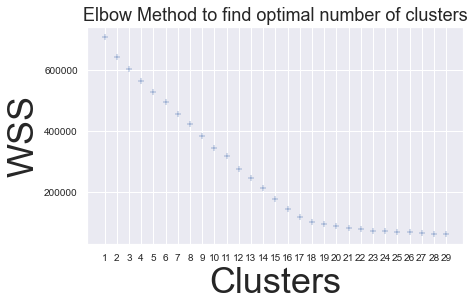

In [380]:
#Plotting Elbow plot
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
sns.set(font_scale=2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
x_axis_ticks = plt.xticks(K)
plt.title("Elbow Method to find optimal number of clusters", fontsize = 18)

xxx

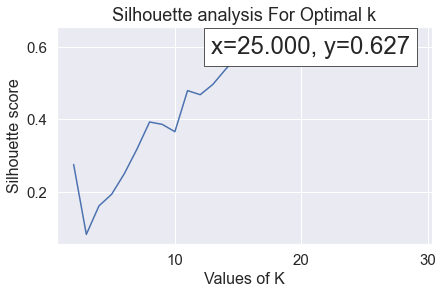

In [381]:
def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = max(y)
    text = "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(
        arrowstyle="->", connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94, 0.96), **kw)

range_n_clusters = np.arange(2,30)
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(scaled_matrix)
 cluster_labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(scaled_matrix, cluster_labels))
 
plt.plot(range_n_clusters, silhouette_avg)
annot_max(range_n_clusters, silhouette_avg)

plt.xlabel("Values of K",fontsize = 16)
plt.ylabel("Silhouette score", fontsize = 16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Silhouette analysis For Optimal k", fontsize = 18)
plt.show()







#### 3.3.2.	Verifying the number of the cluster by using the Silhouette score method

The number of clusters which the elbow graph makes an elbow is 18 but to confirm if that is right, so we will perform silhouette analysis to find k

In [382]:
Silhouette_Scores = []
for i in range(3, 30):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(scaled_matrix).labels_
    Silhouette_Scores.append((i, metrics.silhouette_score(scaled_matrix,labels,metric="euclidean",sample_size=1000,random_state=200).round(5)))
    print("Silhouette score for k(clusters) = "+str(i)+" is " + str(Silhouette_Scores[-1][1]))

Silhouette score for k(clusters) = 3 is 0.0749
Silhouette score for k(clusters) = 4 is 0.19919
Silhouette score for k(clusters) = 5 is 0.20158
Silhouette score for k(clusters) = 6 is 0.26463
Silhouette score for k(clusters) = 7 is 0.30706
Silhouette score for k(clusters) = 8 is 0.39322
Silhouette score for k(clusters) = 9 is 0.4382
Silhouette score for k(clusters) = 10 is 0.44343
Silhouette score for k(clusters) = 11 is 0.46133
Silhouette score for k(clusters) = 12 is 0.50837
Silhouette score for k(clusters) = 13 is 0.54393
Silhouette score for k(clusters) = 14 is 0.53794
Silhouette score for k(clusters) = 15 is 0.59563
Silhouette score for k(clusters) = 16 is 0.60911
Silhouette score for k(clusters) = 17 is 0.60988
Silhouette score for k(clusters) = 18 is 0.62517
Silhouette score for k(clusters) = 19 is 0.63274
Silhouette score for k(clusters) = 20 is 0.64201
Silhouette score for k(clusters) = 21 is 0.64252
Silhouette score for k(clusters) = 22 is 0.64207
Silhouette score for k(cluste

Text(0.5, 1.0, 'Silhouette Score for n number of clusters')

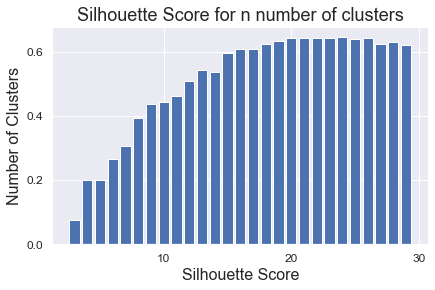

In [383]:
plt.bar([t[0] for t in Silhouette_Scores], [t[1] for t in Silhouette_Scores])
plt.ylabel("Number of Clusters", fontsize=16)
plt.xlabel('Silhouette Score', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Silhouette Score for n number of clusters", fontsize=18)


In [384]:
n_clusters = max(Silhouette_Scores,key=lambda item:item[1])[0]
print("we will make "+str(n_clusters)+" of clusters because it has highest Silhouette score of "+ str(max(Silhouette_Scores,key=lambda item:item[1])[1]))

we will make 24 of clusters because it has highest Silhouette score of 0.64566


#### 3.3.3.	Performing K-Means using the number of clusters defined by the elbow method and Silhouette score

It is confirmed that optimal number of cluster is 24, so we will perfom a k-mean analysis using k as 24

In [385]:
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)


#### 3.3.4.	Plotting the graph for Silhouette values to look at the quality of separation of clusters again

To find the insight on the cluster quality. Graph is taken from the sklearn documentation:

In [386]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

Text(0.5, 1.0, 'The Silhouette plot for various clusters')

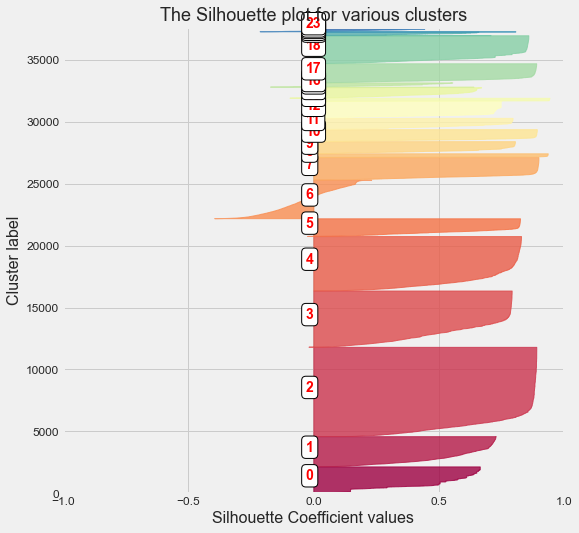

In [387]:
# define individual silhouette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-1, 1], len(scaled_matrix), sample_silhouette_values, clusters_clients)

plt.ylabel('Cluster label', fontsize=16)
plt.xlabel('Silhouette Coefficient values', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("The Silhouette plot for various clusters", fontsize=18)


#### 3.3.5.	Creating a data frame for the clusters and the number of customers in each cluster

Finding how many customers are in each cluster

In [388]:
clust_num = pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['no of customers']).rename_axis('Cluster No').T

In [389]:
clust_num

Cluster No,2,3,4,6,1,18,0,7,17,5,12,9,10,11,14,16,8,20,13,22,23,15,21,19
no of customers,7202,4539,4385,3104,2431,2251,2162,1819,1539,1425,1359,969,961,902,848,337,295,274,237,210,134,27,8,2


Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

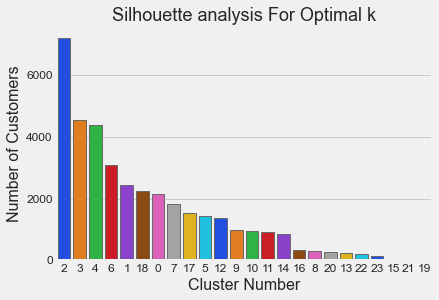

In [390]:
sns.barplot(data=clust_num, palette="bright")
plt.ylabel('Number of Customers', fontsize = 16)
plt.xlabel('Cluster Number',fontsize = 16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Silhouette analysis For Optimal k", fontsize = 18)



### 3.4.	Performing and displaying PCA

#### 3.4.1.	Performing PCA verify the quality of separation between the groups

Because of high disparity in the sizes of clusters we have to analyse the seperations between each cluster so we will perform PCA

In [391]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

#### 3.4.2.	Representing the amount of variance held by each component

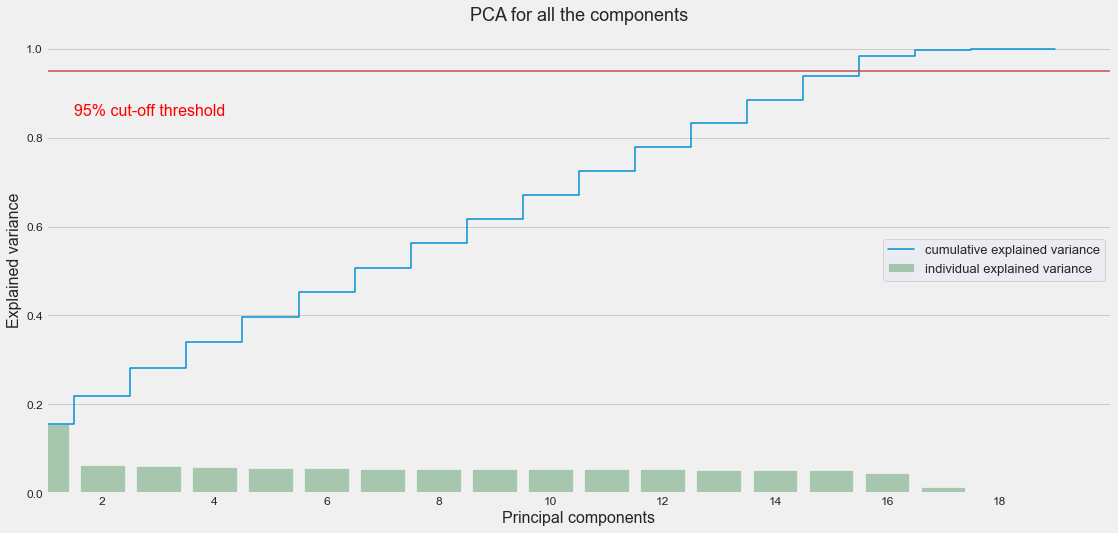

In [392]:
fig, ax = plt.subplots(figsize=(17, 8))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, matrix.shape[1])

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

plt.ylabel('Explained variance', fontsize = 16)
plt.xlabel('Principal components', fontsize = 16)
plt.legend(loc='best', fontsize = 13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("PCA for all the components", fontsize = 18)

plt.show()


To choose number of components it was planned to select the components with 
90% variance but they are 15 components which will result in that explanation so choosing 6 arbitrary to perform the analysis to keep only a limited number of components since this decomposition is only performed to visualize the data


#### 3.4.3.	Performed PCA using 6 number of components

In [393]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

#print(pca.explained_variance_)
print (pca.explained_variance_ratio_)
#print(pca.explained_variance_ratio_.cumsum())

[0.16 0.06 0.06 0.06 0.06 0.06]


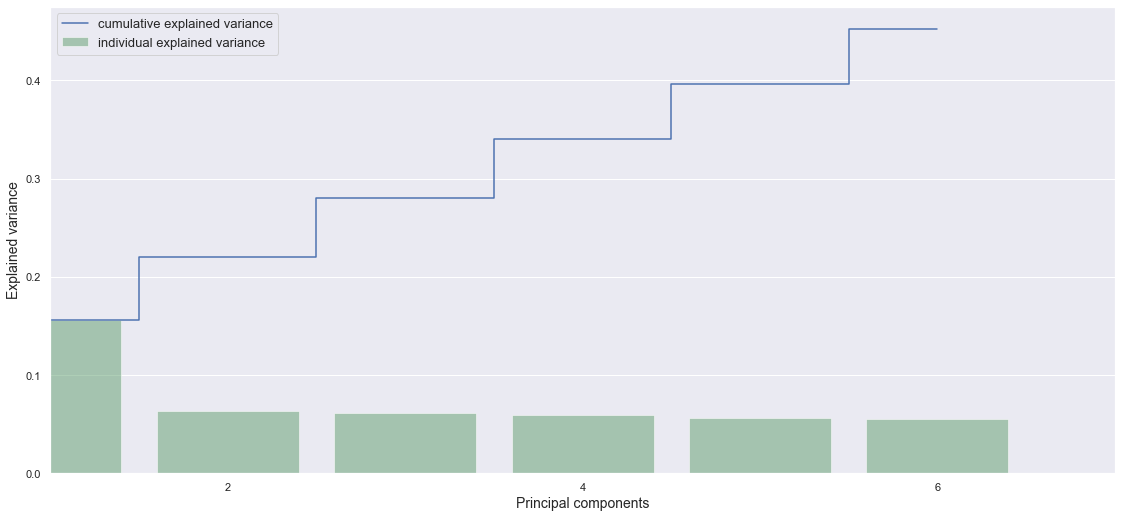

In [394]:
fig, ax = plt.subplots(figsize=(17, 8))
sns.set(font_scale=1)
plt.step(range(matrix_3D.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1, matrix_3D.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color='g',
            label='individual explained variance')
plt.xlim(0, matrix_3D.shape[1])

ax.set_xticklabels([s if int(s.get_text()) %
                    2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize=14)
plt.xlabel('Principal components', fontsize=14)
plt.legend(loc='best', fontsize=13)
plt.show()


In [150]:
mat

,0,1,2,3,4,5,cluster
0,-0.499937,1.394193,1.031429,-2.455400,0.503423,0.183419,20
1,-0.577595,-1.435905,-0.361777,-0.304084,0.106360,0.139524,0
2,3.637301,0.278366,1.240857,3.082648,4.483673,3.095908,23
3,-1.105502,0.985400,-0.606589,1.340729,2.291983,0.047353,3
4,-0.637459,0.130662,-0.064580,0.068668,-0.039592,0.100158,21
...,...,...,...,...,...,...,...
37415,1.812969,-0.129118,2.119337,0.514117,-0.410108,-0.412022,17
37416,-0.716318,0.993601,-0.208348,0.748207,-2.564816,2.860261,2
37417,-0.819611,-2.085665,0.525152,-0.245081,0.028861,0.081409,0
37418,-0.186901,0.359153,0.403668,0.566931,-0.972201,-2.522700,8


#### 3.4.4.	Importing and assigning colours for each cluster

In [151]:
import matplotlib.colors as colors
color_dic = {}
for i in range(n_clusters):
    for i in range(n_clusters):
       color_dic[i] =[key for key in colors.cnames.keys()][9+i]
color_dic

{0: 'blue',
 1: 'blueviolet',
 2: 'brown',
 3: 'burlywood',
 4: 'cadetblue',
 5: 'chartreuse',
 6: 'chocolate',
 7: 'coral',
 8: 'cornflowerblue',
 9: 'cornsilk',
 10: 'crimson',
 11: 'cyan',
 12: 'darkblue',
 13: 'darkcyan',
 14: 'darkgoldenrod',
 15: 'darkgray',
 16: 'darkgreen',
 17: 'darkgrey',
 18: 'darkkhaki',
 19: 'darkmagenta',
 20: 'darkolivegreen',
 21: 'darkorange',
 22: 'darkorchid',
 23: 'darkred'}

#### 3.4.5.	Plotting the clusters to analyse the data

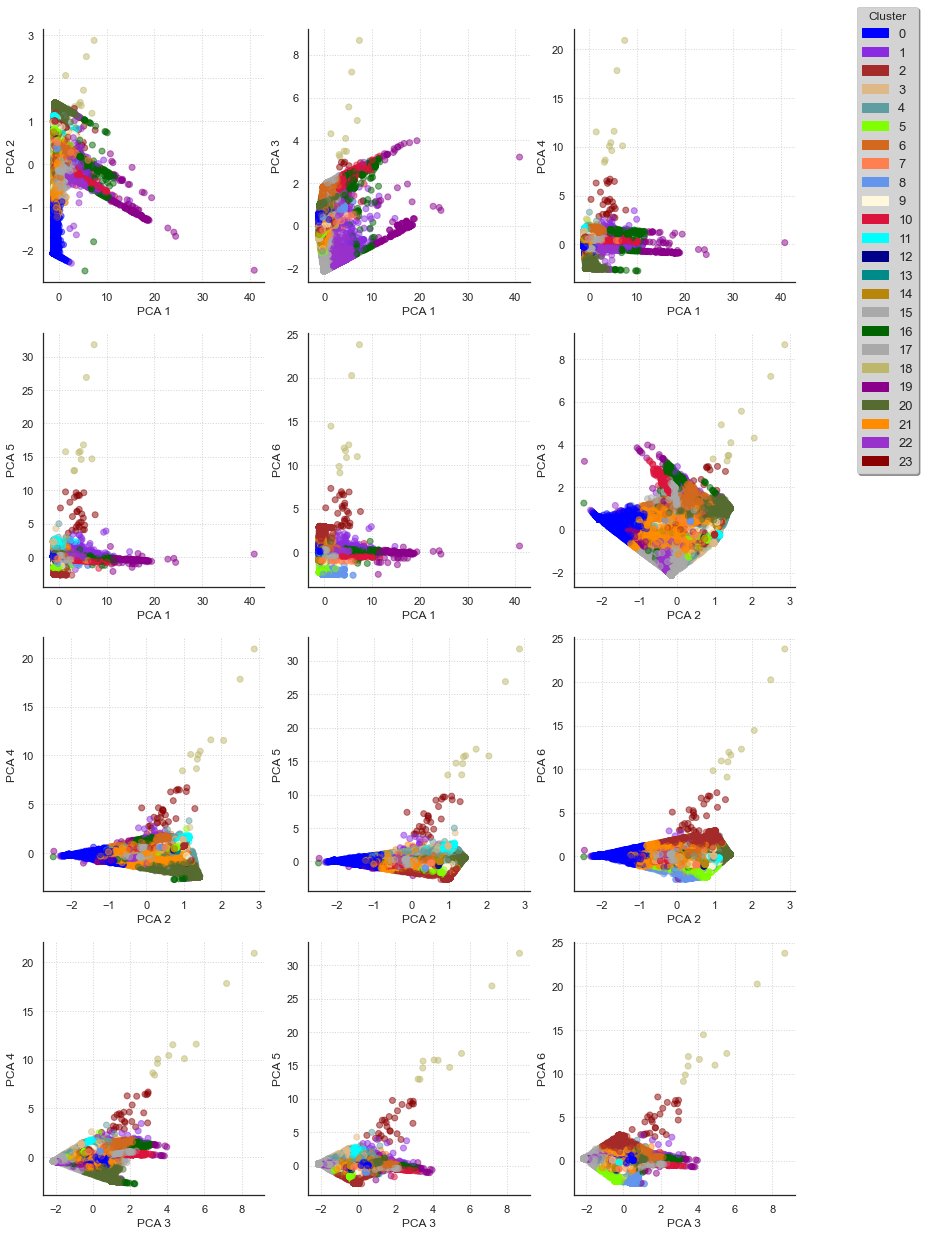

In [152]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
label_color = [color_dic[l] for l in mat["cluster"]]

fig = plt.figure(figsize = (12,20))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = color_dic[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout(pad=5)

### 3.5.	Adding a variable in the selected_customer data frame to define the clusters each customer belongs to

A new variable "Cluster" is added to the dataframe which will have the values stored in clusters_clients

In [153]:
clust_num


Cluster No,0,15,20,21,6,2,22,3,5,9,8,14,7,17,11,4,16,10,13,12,1,19,23,18
no of customers,7122,4511,4370,2960,2423,2236,2162,1798,1538,1422,1358,960,900,824,746,543,337,296,295,237,210,135,27,10


In [154]:
selected_customers.loc[:, 'cluster'] = clusters_clients

In [155]:
selected_customers[selected_customers['cluster'] == 5
]

,Customer ID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,last_purchase,first_purchase,cluster
78,99.0,1,1065.0,1065.0,1065.0,1065.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,364,364,5
106,142.0,2,2880.0,3600.0,3240.0,6480.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278,364,5
119,161.0,1,400.0,400.0,400.0,400.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356,356,5
147,202.0,1,480.0,480.0,480.0,480.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,363,363,5
236,336.0,1,1200.0,1200.0,1200.0,1200.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,362,362,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37374,52717.0,1,1178.0,1178.0,1178.0,1178.0,0.0,0.0,0.0,0.0,0.0,52.631579,47.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
37389,52742.0,1,1050.0,1050.0,1050.0,1050.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
37391,52746.0,1,5000.0,5000.0,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
37399,52760.0,1,845.0,845.0,845.0,845.0,0.0,0.0,0.0,0.0,0.0,100.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5


In [156]:
dataset[dataset["Customer ID"] == selected_customers[selected_customers['cluster'] == 5]["Customer ID"].values[0]]


,item_id,status,order_date,sku,price,qty_ordered,grand_total,order_no,category,discount_amount,payment_method,MV,Customer Since,Customer ID,category number,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,TotalPrice
314,211473.0,Completed,2016-07-01,Rajesh_RAJ033,1065.0,1.0,1065.0,100147687,Health & Sports,0.0,cod,"1,065",2016-07-01,99.0,5,0.0,0.0,0.0,0.0,0.0,1065.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1065.0


### 3.6.	Another data frame is created, “cust_behaviour” this will have the clusters of the customers, their average purchase price, the number of times they ordered, and the minimum and maximum they spent

Number of customer in each group is also calculated

In [157]:

dataset[dataset["Customer ID"]==50387]

,item_id,status,order_date,sku,price,qty_ordered,grand_total,order_no,category,discount_amount,payment_method,MV,Customer Since,Customer ID,category number,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,TotalPrice


In [158]:
dataset[dataset["Customer ID"] == selected_customers[selected_customers['cluster'] == 1]["Customer ID"].values[0]]


,item_id,status,order_date,sku,price,qty_ordered,grand_total,order_no,category,discount_amount,payment_method,MV,Customer Since,Customer ID,category number,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,TotalPrice
16,211149.0,Completed,2016-07-01,cr_DATES WITH CASHEW-400 GM,420.0,1.0,1270.0,100147458,Soghaat,0.0,cod,420,2016-07-01,13.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420.0,0.0,0.0,420.0
17,211150.0,Completed,2016-07-01,UK_Gift Box Mix Dry Fruit Sweets 500 Gms,360.0,1.0,1270.0,100147458,Soghaat,0.0,cod,360,2016-07-01,13.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,360.0,0.0,0.0,360.0
18,211151.0,Completed,2016-07-01,itter_AB 1199,490.0,1.0,1270.0,100147458,Beauty & Grooming,0.0,cod,490,2016-07-01,13.0,1,0.0,490.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,490.0
77,211220.0,Completed,2016-07-01,UK_Namkino Mix Nimco 8 Pcs Gift Pack,760.0,1.0,1195.0,100147501,Soghaat,0.0,cod,760,2016-07-01,13.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,760.0,0.0,0.0,760.0
78,211221.0,Completed,2016-07-01,RS_Gulab jaman Tin,435.0,1.0,1195.0,100147501,Soghaat,0.0,cod,435,2016-07-01,13.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,435.0,0.0,0.0,435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121753,363136.0,Completed,2016-12-03,West Point_Sandwich Toaster - WF-671,1470.0,1.0,470.0,100245336,Appliances,0.0,cod,"1,470",2016-07-01,13.0,0,1470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1470.0
121754,363137.0,Completed,2016-12-03,RAJESH_RAJ170,1930.0,1.0,470.0,100245336,Beauty & Grooming,0.0,cod,"1,930",2016-07-01,13.0,1,0.0,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1930.0
121755,363138.0,Completed,2016-12-03,stinnos_657,670.0,1.0,470.0,100245336,Kids & Baby,0.0,cod,670,2016-07-01,13.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,670.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,670.0
128984,372553.0,Completed,2016-12-20,sg_Sandal Soap-150 gm,270.0,2.0,540.0,100251103,Beauty & Grooming,0.0,cod,540,2016-07-01,13.0,1,0.0,540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540.0


In [159]:
cust_behaviour = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    cust_behaviour = pd.concat([cust_behaviour, test])
#_____________________________________________________
cust_behaviour.drop('Customer ID', axis = 1, inplace = True)
print('number of customers:', cust_behaviour['size'].sum())

cust_behaviour = cust_behaviour.sort_values('sum')
cust_behaviour.sort_index()

number of customers: 37420


,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,last_purchase,first_purchase,size
cluster,,,,,,,,,,,,,,,,,,,,,,,
0.0,1.498175,1026.810397,1246.743255,1124.147899,1.624905e+03,0.143667,0.524396,0.016852,0.092556,0.015033,0.280929,0.213559,0.310750,95.185470,0.736502,0.154484,0.053480,0.417723,0.067220,0.537293,164.436816,175.647290,7122
1.0,17.571429,3738.545238,74023.225714,24606.195682,2.281659e+05,21.657721,0.858828,0.066772,3.080952,6.877831,0.369248,1.357809,0.396350,1.430566,45.923655,1.002372,0.039996,0.406981,2.781251,2.827828,79.861905,207.233333,210
2.0,1.479875,1624.624441,1870.735130,1734.259315,2.232961e+03,0.336101,92.476643,0.078291,0.025380,0.000000,0.429015,0.683310,0.281733,1.277942,0.779645,0.286131,0.103790,0.647707,0.121597,0.731609,176.255814,189.213775,2236
3.0,2.054505,550.558593,751.864349,631.712048,1.399276e+03,0.279544,0.717322,0.084808,0.095003,0.000000,0.220375,0.377516,0.324143,1.336506,0.796681,0.162249,0.102468,93.377768,0.561170,0.242936,202.862069,223.553393,1798
4.0,6.108656,843.147790,2462.956630,1300.352403,8.018467e+03,2.886675,3.176695,0.053675,1.207615,0.634656,1.960691,3.278413,1.927147,8.912149,6.484809,3.312400,0.398225,8.335616,41.157164,3.986491,115.604052,194.554328,543
5.0,1.492848,1298.123082,1560.871586,1416.281661,2.036304e+03,0.233112,1.045110,0.108359,0.139312,0.025122,92.714960,0.405320,0.191857,1.213762,1.080882,0.663580,0.118011,0.411597,0.111058,0.511862,171.153446,185.408322,1538
6.0,2.199752,2867.067598,6111.186401,4005.853777,8.352963e+03,83.541944,0.910916,0.043149,0.288300,0.218341,0.477814,1.084142,0.451158,1.936443,1.729085,0.410163,0.050977,0.726903,0.368946,0.660397,153.917458,183.903013,2423
7.0,1.404444,2205.502778,3318.251211,2661.040462,3.930010e+03,0.495508,0.676568,0.001375,83.907766,0.410445,0.370771,0.499677,0.311384,1.371406,2.114177,0.216410,0.040502,0.613861,0.315223,0.245053,173.767778,189.218889,900
8.0,1.524300,6062.475368,7458.017342,6638.312316,9.364937e+03,0.183468,0.263905,0.040385,0.102046,0.054951,0.300229,0.272448,0.158035,0.898876,1.771147,92.657541,0.030236,0.220478,0.145590,0.243672,226.491163,242.755523,1358


### 3.7.	Cluster’s Insight (A radar chart is created to represent the insight)

#### 3.7.1.	 A class is defined to build a radar chart; this is copied from (https://www.kaggle.com/yassineghouzam/don-t-know-why-employees-leave%20-read-this)

In [160]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes,axis_title, variables, ranges,n_ordinate_levels=5):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, label="axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = axis_title)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            fig.canvas.draw()
            grid = np.linspace(*ranges[i], num = n_ordinate_levels)
            grid_label = [""]+[""]+["{:.0f}".format(x) for x in grid[2:-1]] + [""]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.xaxis.set_tick_params(pad=20)
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)


#### 3.7.2.	Finding ranges for the variables that will be used in Radar Chart 

In [161]:

attributes = ['count', 'mean', 'sum']+[f'category_{i}' for i in range(15)]
[i for i in zip(cust_behaviour[attributes].min(), cust_behaviour[attributes].max())]


[(1.1418918918918919, 920.5),
 (631.7120484017381, 85362.6578563412),
 (1242.7976271186442, 1738272.375),
 (0.12598478103845057, 83.54194443074341),
 (0.04584388949209796, 92.47664264902629),
 (0.0, 95.59592175675297),
 (0.0, 83.9077661598928),
 (0.0, 83.34066384520669),
 (0.0, 92.71495967409065),
 (0.05449469902148156, 87.6514785738693),
 (0.0, 91.72395024487291),
 (0.012437392853541297, 95.18547019170151),
 (0.4033789531318731, 93.21183379990931),
 (0.0030021667812421137, 92.65754074839877),
 (0.0, 94.84338157531468),
 (0.0, 93.37776751699624),
 (0.0, 91.86598907127497),
 (0.0, 92.89152145516866)]

In [162]:
Count_range = [0,650] 
Sum_range = [0.063,1800]
Mean_range = [0.013,180]
category_range = [0,100]

#### 3.7.3.	Parameters are set, and a radar chart is constructed to get insight into the clusters

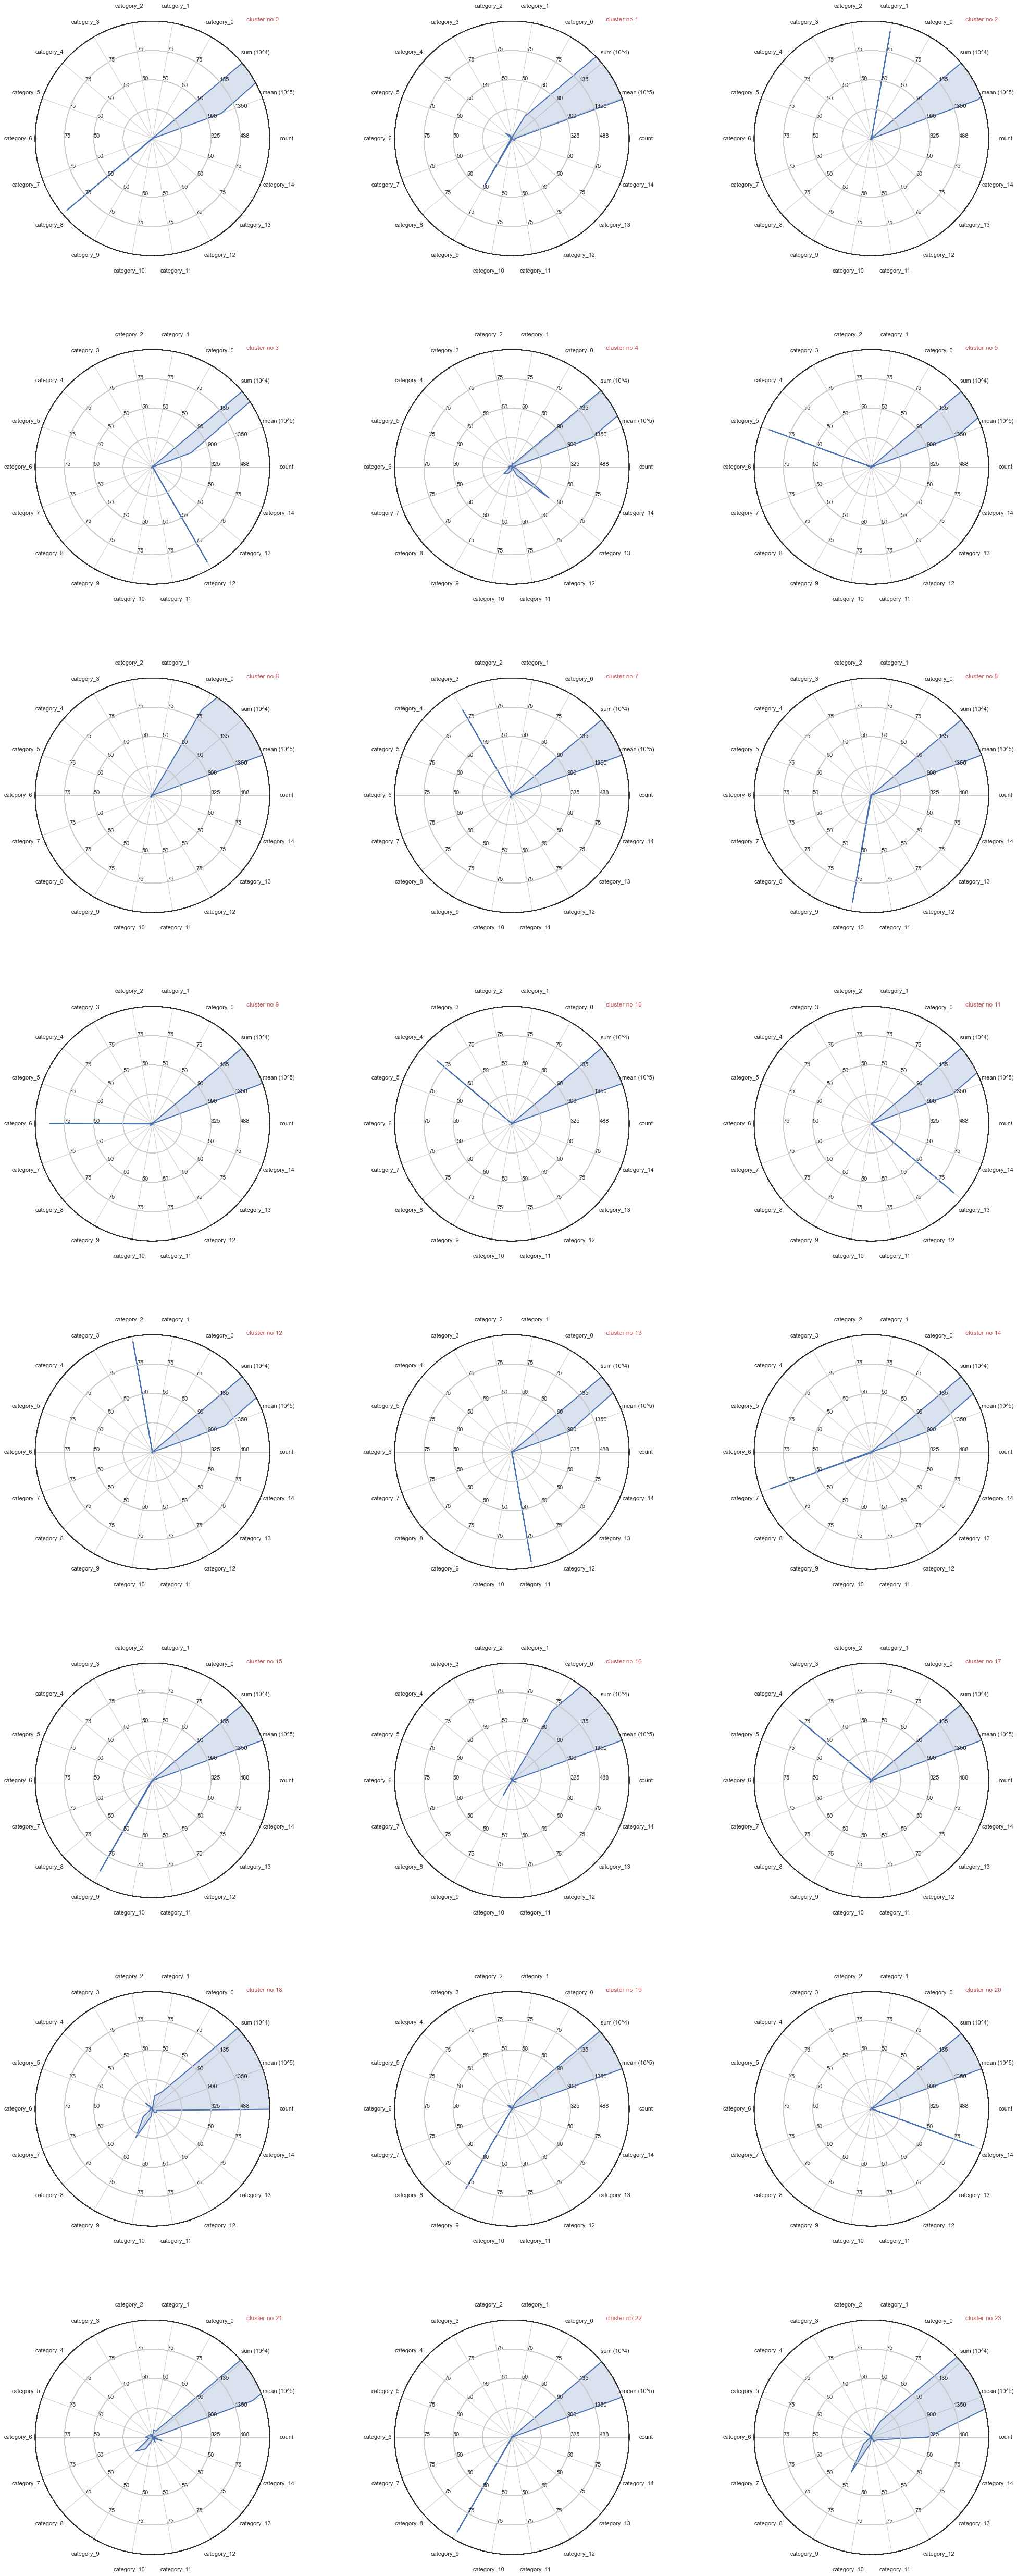

In [163]:
fig = plt.figure(figsize=(25,50))
axis_title = ['count', 'mean (10^5)', 'sum (10^4)']+[f'category_{i}' for i in range(15)]
attributes = ['count', 'mean', 'sum']+[f'category_{i}' for i in range(15)]
ranges = [Count_range, Sum_range, Mean_range]+[[0,100] for i in range(15)]
index  = np.arange(n_clusters)

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    #Setting figure cosmetics
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) 
    pos_y = iy*(size_y + 0.05)
    location = [pos_x, pos_y] 
    sizes = [size_x, size_y]
    #Filling details of chart
    data = np.array(cust_behaviour.loc[index[ind], attributes])
    radar = RadarChart(fig, location, sizes,axis_title, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0) #linewidth of vlue plot inside
    radar.fill(data, alpha = 0.2, color = 'b') #inside of blue plot 
    radar.title(title = 'cluster no {}'.format(index[ind]), color = 'r')
    ind += 1


### 3.8. Cluster Insight using Parallel Coordinates plot

In [164]:
df = px.data.iris()
fig = px.parallel_coordinates(cust_behaviour, color="mean",
                              dimensions=['count', 'mean', 'sum']+[f'category_{i}' for i in range(15)],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()
pio.write_image(fig, 'parallel_coordinates.png')

# 4.	Classification of Customers

We are using multiple machine learning algorithms to classify customers in the categories we have already established. To train the algorithms to make predictions for the future.
So we will be adjusting classifiers and test them

### 4.1.1.	A class is defined to ease up the process functionality

In order to simplify the use, a class is created, which will interface several common functionalities in the classifiers

In [165]:
class Class_Fit():
    # Move all class fields at the top (assign nothing if nothing can be assigned)
    def __init__(self, clf, params=None):
        self.clf = (clf(**params) if params else clf())
        self.grid = None
        self.predictions = None

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))
        

#### 4.1.2.	Shortlisting only means of the purchase and the categories that order belongs to, assigning that on the X axis and putting clusters on the Y axis

In [166]:
columns = ['mean']+[f'category_{i}' for i in range(15)]
X = selected_customers[columns]
Y = selected_customers['cluster']

#### 4.1.3.	Splitting the dataset into Test and Train using a size of 80%

In [167]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

#### 4.1.4.	Defining class for the learning curve

Code is used from sklearn documentation and a class is made for learning curve

In [168]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#### 4.1.5.	Defining class for the confusion matrix

A class is constructed to make the confusion matrix. The code is taken from sklearn documentation:

In [169]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 4.2.	Performing SVC

#### 4.2.1.	Calling Class on the SVC and Setting hyperparameters and number of folds

In [170]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters=[{'C': np.logspace(-2, 2, 10)}], Kfold=5)
svc.grid_fit(X=X_train, Y=Y_train)
svc.grid_predict(X_test, Y_test)

Precision: 87.61 % 


The precision output is good. But as there was an imbalance in the sizes of the clusters, so we will look how the predictions and real values actially look. To do that we will make confusion matrix 

#### 4.2.2.	Build Confusion Matrix for SVC

Confusion matrix, without normalization


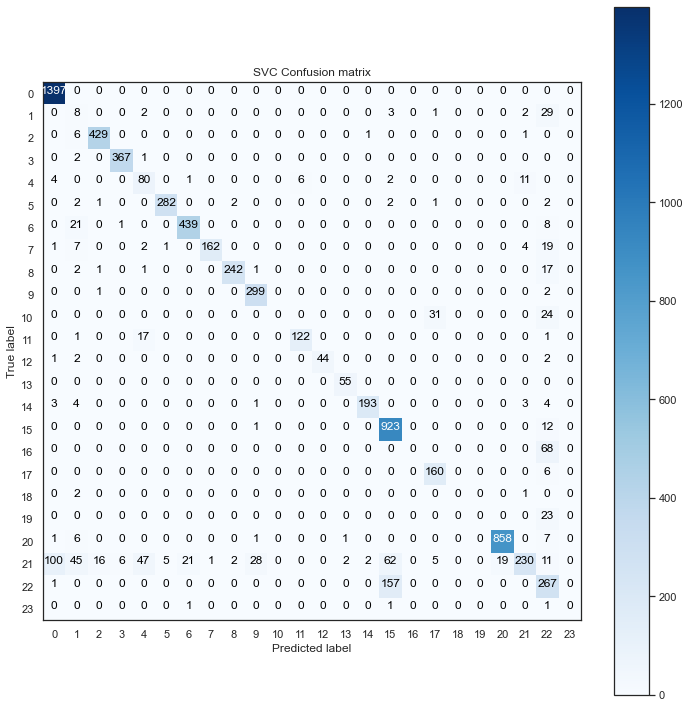

In [171]:
class_names = [i for i in range(n_clusters)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='SVC Confusion matrix')

#### 4.2.3. Classification Report for SVC's confusion matrix

In [173]:
x_df=pd.DataFrame(classification_report(Y_test, svc.predictions, output_dict=True)).transpose()
x_df


,precision,recall,f1-score,support
0,0.926393,1.000000,0.961790,1397.000000
1,0.074074,0.177778,0.104575,45.000000
2,0.957589,0.981693,0.969492,437.000000
3,0.981283,0.991892,0.986559,370.000000
4,0.533333,0.769231,0.629921,104.000000
5,0.979167,0.965753,0.972414,292.000000
6,0.950216,0.936034,0.943072,469.000000
7,0.993865,0.826531,0.902507,196.000000
8,0.983740,0.916667,0.949020,264.000000
9,0.903323,0.990066,0.944708,302.000000


In [174]:
print("Micro f1 score for SVC: " +
      str(f1_score(Y_test, svc.predictions, average="micro")))
print("Weighted f1 score for SVC: " +
      str(f1_score(Y_test, svc.predictions, average="weighted")))

Micro f1 score for SVC: 0.8761357562800642
Weighted f1 score for SVC: 0.8641958923995482


In [175]:
stats.hmean(x_df.iloc[:,1:4],axis=0)

array([ 0.  ,  0.  , 13.48])

In [176]:
fbeta_score(Y_test, svc.predictions, average='micro', beta=0.5)


0.8761357562800641

In [177]:
fbeta_score(Y_test, svc.predictions, average='weighted', beta=0.5)

0.8662574224035811

In [178]:
f1 = f1_score(Y_test, svc.predictions, average='weighted')
f0_5 = fbeta_score(Y_test, svc.predictions, beta=0.5, average='weighted')
f2 = fbeta_score(Y_test, svc.predictions, beta=2, average='weighted')
prec = precision_score(Y_test, svc.predictions, average='weighted')
rec = recall_score(Y_test, svc.predictions, average='weighted')

print(f1,f0_5,f2,prec,rec)

0.8641958923995482 0.8662574224035811 0.8696138240883812 0.8750988263338282 0.8761357562800641


### 4.2.5.	Plotting Learning Curve

A learning curve is used to test quality of a fit. This will detect possible drawbacks in the model like over fitting or underfitting. 

#### 4.2.5.2.	Setting parameters for the plot

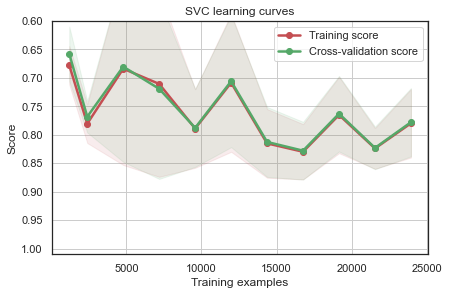

In [179]:
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [1.01, 0.6],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

### 4.3.	Performing Logistic Regression

#### 4.3.1.	Calling class on the logistic regression and setting hyperparameters to find precision

In [180]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 80.21 % 


Confusion matrix, without normalization


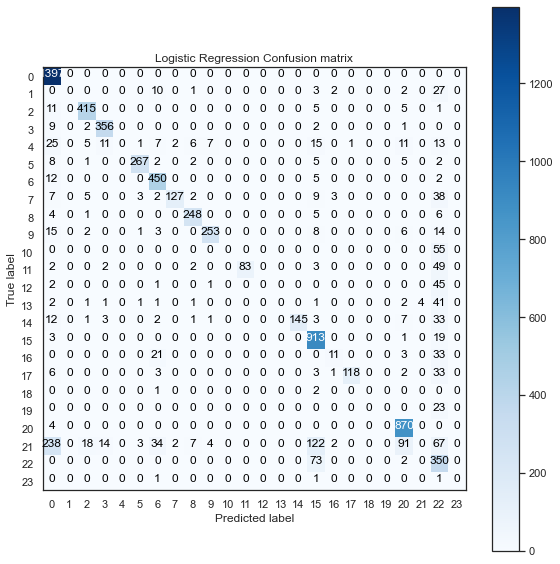

In [181]:
class_names = [i for i in range(n_clusters)]
cnf_matrix = confusion_matrix(Y_test, lr.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Logistic Regression Confusion matrix')

In [182]:
pd.DataFrame(classification_report(Y_test, lr.predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.795105,1.000000,0.885859,1397.000000
1,0.000000,0.000000,0.000000,45.000000
2,0.920177,0.949657,0.934685,437.000000
3,0.919897,0.962162,0.940555,370.000000
4,0.000000,0.000000,0.000000,104.000000
5,0.967391,0.914384,0.940141,292.000000
6,0.836431,0.959488,0.893744,469.000000
7,0.969466,0.647959,0.776758,196.000000
8,0.918519,0.939394,0.928839,264.000000
9,0.951128,0.837748,0.890845,302.000000


In [183]:
print("Micro f1 score for Logistic Regression: " +
      str(f1_score(Y_test, lr.predictions, average="micro")))
print("Weighted f1 score for Logistic Regression: " +
      str(f1_score(Y_test, lr.predictions, average="weighted")))


Micro f1 score for Logistic Regression: 0.8021111704970604
Weighted f1 score for Logistic Regression: 0.7527685719610341


#### 4.3.2.	Plotting the curve of training and testing scores to observe the quality

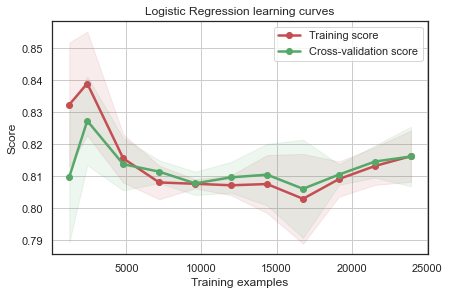

In [184]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 4.4.	Performing K-Nearest Neighbors

#### 4.4.1.	Calling class on the K-Nearest, and setting hyperparameters to find precision

In [185]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,100,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 92.58 % 


Confusion matrix, without normalization


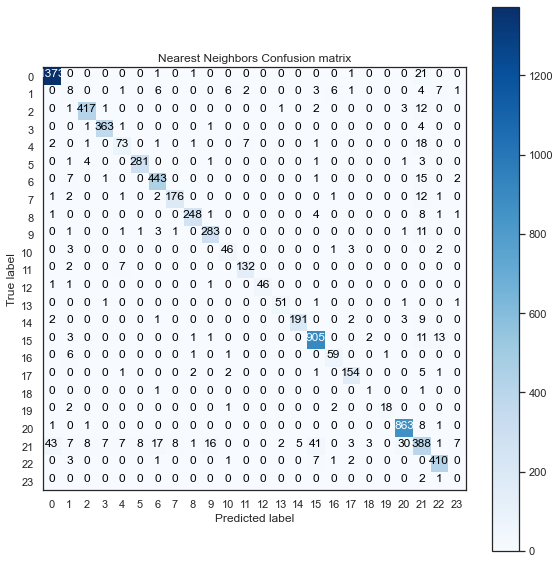

In [186]:
class_names = [i for i in range(n_clusters)]
cnf_matrix = confusion_matrix(Y_test, knn.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      normalize=False, title='Nearest Neighbors Confusion matrix')


In [187]:
pd.DataFrame(classification_report(Y_test, knn.predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.964185,0.982820,0.973414,1397.000000
1,0.170213,0.177778,0.173913,45.000000
2,0.965278,0.954233,0.959724,437.000000
3,0.973190,0.981081,0.977120,370.000000
4,0.793478,0.701923,0.744898,104.000000
5,0.968966,0.962329,0.965636,292.000000
6,0.930672,0.944563,0.937566,469.000000
7,0.951351,0.897959,0.923885,196.000000
8,0.972549,0.939394,0.955684,264.000000
9,0.930921,0.937086,0.933993,302.000000


In [188]:
print("Micro f1 score for Nearest Neighbors: " +
      str(f1_score(Y_test, knn.predictions, average="micro")))
print("Weighted f1 score for Nearest Neighbors: " +
      str(f1_score(Y_test, knn.predictions, average="weighted")))


Micro f1 score for Nearest Neighbors: 0.9258417958311064
Weighted f1 score for Nearest Neighbors: 0.9251662858859859


#### 4.4.2.	Plotting the curve of training and testing scores to observe the quality

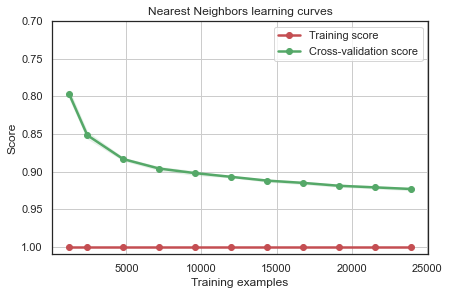

In [189]:
g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 4.5.	Decision Tree

#### 4.5.1.	Calling class on the Decision Tree and setting hyperparameters to find precision

In [190]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 97.66 % 


Confusion matrix, without normalization


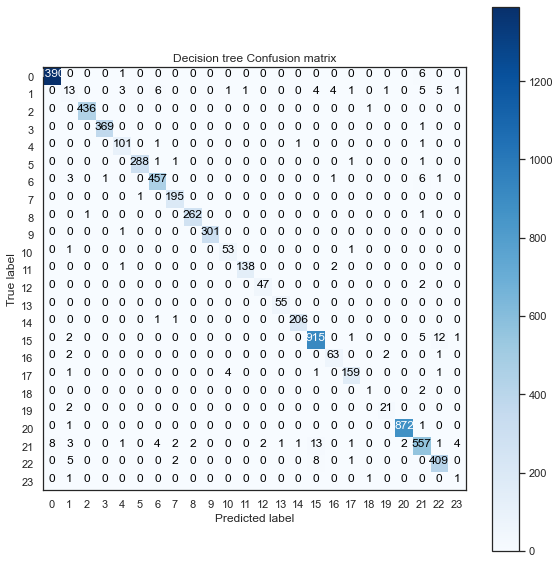

In [191]:
class_names = [i for i in range(n_clusters)]
cnf_matrix = confusion_matrix(Y_test, tr.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      normalize=False, title='Decision tree Confusion matrix')


In [192]:
pd.DataFrame(classification_report(Y_test, tr.predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.994278,0.994989,0.994633,1397.000000
1,0.382353,0.288889,0.329114,45.000000
2,0.997712,0.997712,0.997712,437.000000
3,0.997297,0.997297,0.997297,370.000000
4,0.935185,0.971154,0.952830,104.000000
5,0.996540,0.986301,0.991394,292.000000
6,0.972340,0.974414,0.973376,469.000000
7,0.970149,0.994898,0.982368,196.000000
8,0.992424,0.992424,0.992424,264.000000
9,1.000000,0.996689,0.998342,302.000000


In [193]:
print("Micro f1 score for decision tree: "+str(f1_score(Y_test, tr.predictions, average="micro")))
print("Weighted f1 score for decision tree: " + str(f1_score(Y_test, tr.predictions, average="weighted")))


Micro f1 score for decision tree: 0.9766167824692678
Weighted f1 score for decision tree: 0.9763466304300912


#### 4.5.2.	Plotting the curve of training and testing scores to observe the quality

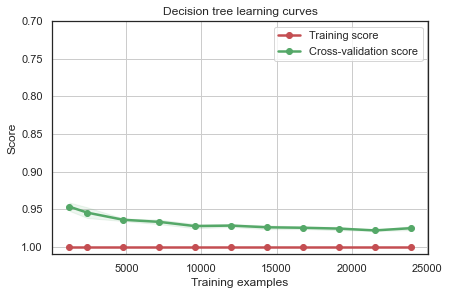

In [194]:
g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 4.6.	Random Forest

#### 4.6.1.	Calling class on the Random Forest and setting hyperparameters to find precision

In [195]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 98.26 % 


Confusion matrix, without normalization


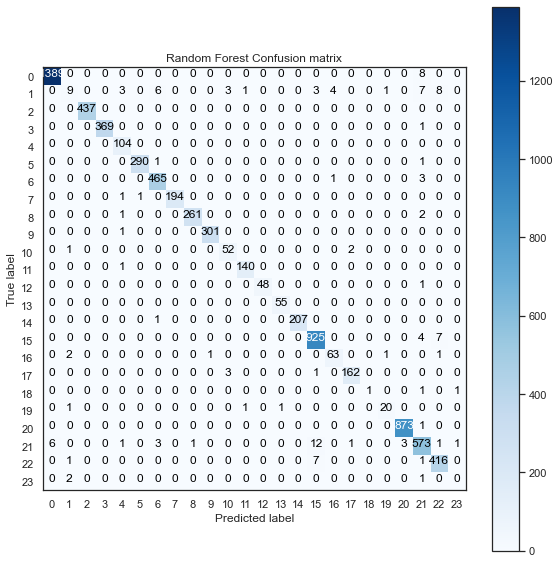

In [196]:
class_names = [i for i in range(n_clusters)]
cnf_matrix = confusion_matrix(Y_test, rf.predictions)
np.set_printoptions(precision=2)
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      normalize=False, title='Random Forest Confusion matrix')


In [197]:
pd.DataFrame(classification_report(Y_test, rf.predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.995699,0.994273,0.994986,1397.00000
1,0.562500,0.200000,0.295082,45.00000
2,1.000000,1.000000,1.000000,437.00000
3,1.000000,0.997297,0.998647,370.00000
4,0.928571,1.000000,0.962963,104.00000
5,0.996564,0.993151,0.994854,292.00000
6,0.976891,0.991471,0.984127,469.00000
7,1.000000,0.989796,0.994872,196.00000
8,0.996183,0.988636,0.992395,264.00000
9,0.996689,0.996689,0.996689,302.00000


In [198]:
print("Micro f1 score for Random Forest: " +
      str(f1_score(Y_test, rf.predictions, average="micro")))
print("Weighted f1 score for Random Forest: " +
      str(f1_score(Y_test, rf.predictions, average="weighted")))


Micro f1 score for Random Forest: 0.9826296098343132
Weighted f1 score for Random Forest: 0.9811998543334215


#### 4.6.2.	Plotting the curve of training and testing scores to observe the quality

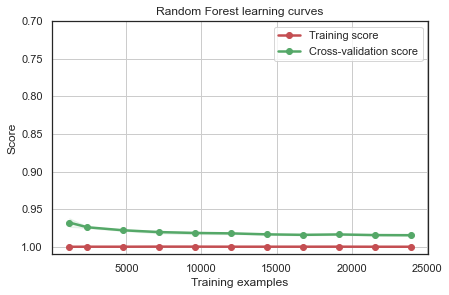

In [199]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 4.7.	AdaBoost Classifier

#### 4.7.1.	Calling class on the AdaBoost Classifier and setting hyperparameters to find precision

In [200]:
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)

Precision: 32.40 % 


Confusion matrix, without normalization


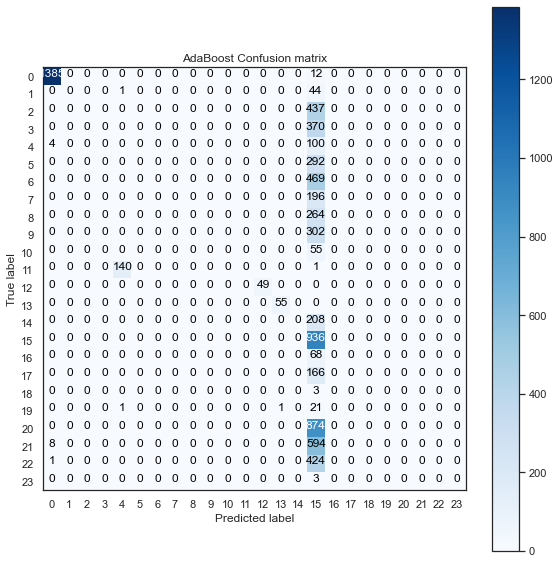

In [201]:
class_names = [i for i in range(n_clusters)]
cnf_matrix = confusion_matrix(Y_test, ada.predictions)
np.set_printoptions(precision=2)
plt.figure(figsize=(8, 8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      normalize=False, title='AdaBoost Confusion matrix')


In [202]:
pd.DataFrame(classification_report(Y_test, ada.predictions, output_dict=True)).transpose()


,precision,recall,f1-score,support
0,0.990701,0.991410,0.991055,1397.000000
1,0.000000,0.000000,0.000000,45.000000
2,0.000000,0.000000,0.000000,437.000000
3,0.000000,0.000000,0.000000,370.000000
4,0.000000,0.000000,0.000000,104.000000
5,0.000000,0.000000,0.000000,292.000000
6,0.000000,0.000000,0.000000,469.000000
7,0.000000,0.000000,0.000000,196.000000
8,0.000000,0.000000,0.000000,264.000000
9,0.000000,0.000000,0.000000,302.000000


In [203]:
print("Micro f1 score for AdaBoost: " +
      str(f1_score(Y_test, ada.predictions, average="micro")))
print("Weighted f1 score for AdaBoost: " +
      str(f1_score(Y_test, ada.predictions, average="weighted")))


Micro f1 score for AdaBoost: 0.32402458578300375
Weighted f1 score for AdaBoost: 0.23338256309963562


#### 4.7.2.	Plotting the curve of training and testing scores to observe the quality

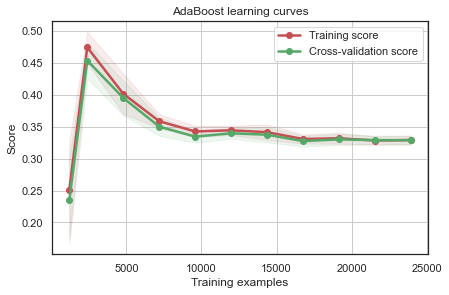

In [204]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, Y_train,
                        cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 4.8.	Gradient Boosting Classifier

#### 4.8.1.	Calling class on the Gradient Boosting Classifier and setting hyperparameters to find precision

In [205]:
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

Precision: 98.26 % 


Confusion matrix, without normalization


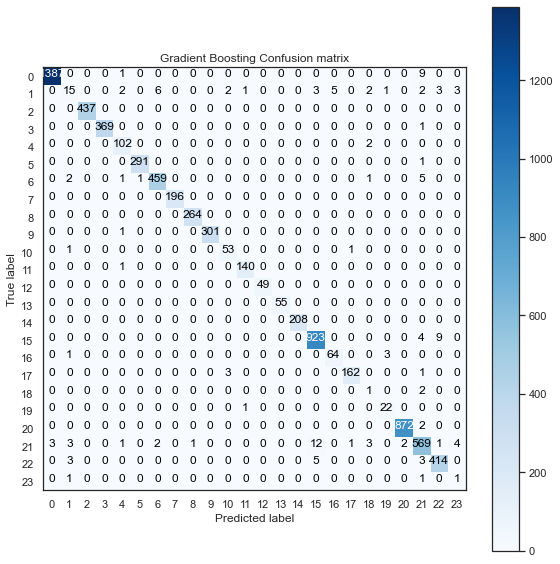

In [206]:
class_names = [i for i in range(n_clusters)]
cnf_matrix = confusion_matrix(Y_test, gb.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Gradient Boosting Confusion matrix')


In [207]:
pd.DataFrame(classification_report(Y_test, gb.predictions, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.997842,0.992842,0.995335,1397.00000
1,0.576923,0.333333,0.422535,45.00000
2,1.000000,1.000000,1.000000,437.00000
3,1.000000,0.997297,0.998647,370.00000
4,0.935780,0.980769,0.957746,104.00000
5,0.996575,0.996575,0.996575,292.00000
6,0.982869,0.978678,0.980769,469.00000
7,1.000000,1.000000,1.000000,196.00000
8,0.996226,1.000000,0.998110,264.00000
9,1.000000,0.996689,0.998342,302.00000


In [208]:
print("Micro f1 score for Gradient Boosting: " +
      str(f1_score(Y_test, gb.predictions, average="micro")))
print("Weighted f1 score for Gradient Boosting: " +
      str(f1_score(Y_test, gb.predictions, average="weighted")))


Micro f1 score for Gradient Boosting: 0.9826296098343132
Weighted f1 score for Gradient Boosting: 0.9825536338598433


#### 4.8.2.	Plotting the curve of training and testing scores to observe the quality

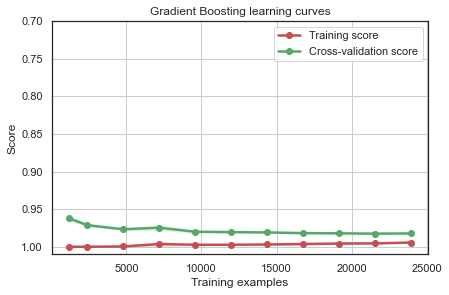

In [209]:
g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 4.9.	Voting Classifier

#### 4.9.1.	Finding the best parameters for each classifier

In [210]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

#### 4.9.2.	Doing voting from Sklearn to predict the class labels to ensemble well-calibrated classifiers, which will use sums of probabilities

In [211]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('dt', tr_best)], voting='soft')    

#### 4.9.3.	Training Dataset on the voting classifier

In [212]:
votingC = votingC.fit(X_train, Y_train)

#### 4.9.4.	Finding precession of the classifier

In [213]:
votingC.predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, votingC.predictions)))

Precision: 98.24 % 


Confusion matrix, without normalization


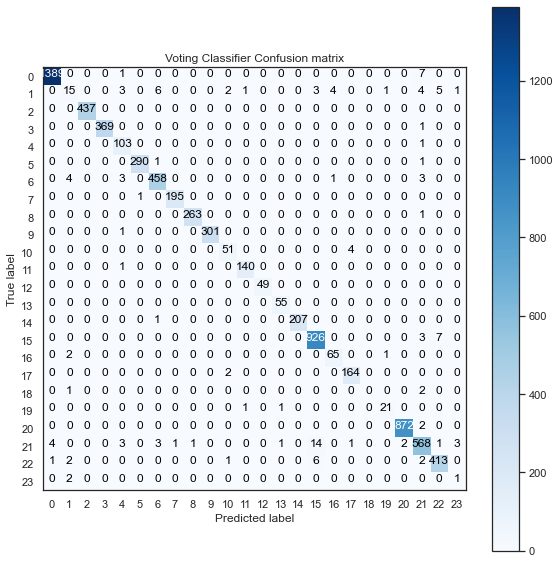

In [214]:
class_names = [i for i in range(n_clusters)]
cnf_matrix = confusion_matrix(Y_test, votingC.predictions)
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Voting Classifier Confusion matrix')


In [215]:
pd.DataFrame(classification_report(Y_test, votingC.predictions, output_dict=True)).transpose()


,precision,recall,f1-score,support
0,0.996413,0.994273,0.995342,1397.000000
1,0.576923,0.333333,0.422535,45.000000
2,1.000000,1.000000,1.000000,437.000000
3,1.000000,0.997297,0.998647,370.000000
4,0.895652,0.990385,0.940639,104.000000
5,0.996564,0.993151,0.994854,292.000000
6,0.976546,0.976546,0.976546,469.000000
7,0.994898,0.994898,0.994898,196.000000
8,0.996212,0.996212,0.996212,264.000000
9,1.000000,0.996689,0.998342,302.000000


In [216]:
print("Micro f1 score for Voting Classifier: " +
      str(f1_score(Y_test, votingC.predictions, average="micro")))
print("Weighted f1 score for Voting Classifier: " +
      str(f1_score(Y_test, votingC.predictions, average="weighted")))


Micro f1 score for Voting Classifier: 0.9823623730625334
Weighted f1 score for Voting Classifier: 0.9815849050980182


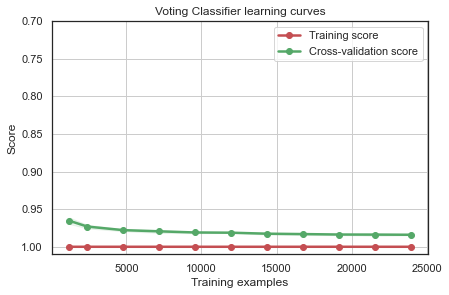

In [217]:
g = plot_learning_curve(votingC, "Voting Classifier learning curves", X_train, Y_train,
                        ylim=[1.01, 0.7], cv=5,
                        train_sizes=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


# 5.	Testing the models

#### 5.1.	Using the test data frame, we separated the previous steps

In [218]:
purchase_price = test_data.copy(deep = True)

In [219]:
purchase_price

,Customer ID,order_no,purchase price,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14,date
214,4.0,100374843,13699.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12249.0,0.0,0.0,0.0,0.0,0.0,2017-11-03
215,4.0,100376930,14000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11700.0,0.0,0.0,0.0,0.0,0.0,2017-11-10
216,4.0,100377141,1246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1246.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-11-10
217,4.0,100377220,14000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11700.0,0.0,0.0,0.0,0.0,0.0,2017-11-10
218,4.0,100377265,14000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11700.0,0.0,0.0,0.0,0.0,0.0,2017-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202309,115323.0,100562365,44199.0,44199.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-08-28
202310,115324.0,100562376,399.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-08-28
202311,115325.0,100562383,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0,2018-08-28
202312,115325.0,100562384,499.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,499.0,2018-08-28


#### 5.2.	Grouping the dataset as before to create the transaction_per_user dataset

In [220]:
orders_per_customer=purchase_price.groupby(by=['Customer ID'])['purchase price'].agg(['count','min','max','mean','sum'])
for i in range(15):
    col = 'category_{}'.format(i)
    orders_per_customer.loc[:,col] = purchase_price.groupby(by=['Customer ID'])[col].sum() /\
                                            orders_per_customer['sum']*100

orders_per_customer.reset_index(drop = False, inplace = True)
purchase_price.groupby(by=['Customer ID'])['category_0'].sum()

#_______________________
# Correcting time range
orders_per_customer['count'] = 5 * orders_per_customer['count']
orders_per_customer['sum']   = orders_per_customer['count'] * orders_per_customer['mean']

orders_per_customer.sort_values('Customer ID', ascending = True)[:5]

,Customer ID,count,min,max,mean,sum,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_9,category_10,category_11,category_12,category_13,category_14
0,4.0,85,698.0,94792.0,19824.529412,1685085.0,3.261794,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.693386,83.497479,0.0,0.0,0.317788,0.000000,0.000000
1,15.0,20,574.0,1065.0,808.250000,16165.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,33.405506,17.754408,24.713888,0.000000,0.0,0.0,3.402413,20.723786,0.000000
2,16.0,15,1660.0,5423.0,4119.000000,61785.0,0.000000,0.404629,0.0,37.209679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,6.789512,45.350975
3,20.0,40,1859.0,61575.0,35142.375000,1405695.0,82.890670,0.000000,0.0,0.000000,6.219343,1.417804,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,21.0,10,1050.0,1080.0,1065.000000,10650.0,0.000000,49.295775,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,50.704225,0.000000


#### 5.3.	Converting the dataset into the matrix and standardising it 

In [221]:
list_cols = ['count','min','max','mean']  + [f'category_{i}' for i in range(15)]
#_____________________________________________________________
matrix_test = orders_per_customer[list_cols].values
scaled_test_matrix = scaler.transform(matrix_test)

#### 5.4.	Performing a K-Means analysis to find the clusters on this dataset

In [222]:
Y = kmeans.predict(scaled_test_matrix)

#### 5.5.	Making predictions from the trained classifier and checking it with the K-Means answer to check the precision of predictions

In [223]:
columns = ['mean']  + [f'category_{i}' for i in range(15)]
X = orders_per_customer[columns]

#### 5.6.	Improving the quality of classification’s prediction by combining the best outputting classifiers

In [224]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logistic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest'),
                (gb, 'Gradient Boosting')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine
Precision: 82.32 % 
______________________________ 
Logistic Regression
Precision: 76.76 % 
______________________________ 
k-Nearest Neighbors
Precision: 86.21 % 
______________________________ 
Decision Tree
Precision: 95.08 % 
______________________________ 
Random Forest
Precision: 96.25 % 
______________________________ 
Gradient Boosting
Precision: 96.11 % 


# Predicting the **Final Score**

In [225]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 95.80 % 
